In [194]:
#including libraries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

df = pd.read_csv ('1806396.csv')#reads file

In [195]:
for col in df.columns: 
    print(col) 

business_code
cust_number
name_customer
clear_date
buisness_year
doc_id
posting_date
document_create_date
document_create_date.1
due_in_date
invoice_currency
document type
posting_id
area_business
total_open_amount
baseline_create_date
cust_payment_terms
invoice_id
isOpen


In [196]:
df['cust_payment_terms'].describe()

count     50000
unique       74
top        NAA8
freq      20107
Name: cust_payment_terms, dtype: object

In [197]:
df[df.isOpen== 1]#checking values assosciated with isOpen==1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
45585,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930767e+09,2020-04-09,20200408,20200409,20200424.0,USD,RV,1.0,NaN,55983.51,20200409.0,NAH4,1.930767e+09,1
45586,U001,0200772670,ASSOCIAT co,NaN,2020.0,1.930682e+09,2020-03-20,20200320,20200320,20200404.0,USD,RV,1.0,NaN,179.17,20200320.0,NAU5,1.930682e+09,1
45587,CA02,0140105847,GORDON F foundation,NaN,2020.0,2.960618e+09,2020-03-04,20200304,20200304,20200316.0,CAD,RV,1.0,NaN,3587.75,20200306.0,CA10,2.960618e+09,1
45588,U001,0200900909,SYSCO foundation,NaN,2020.0,1.930585e+09,2020-03-03,20200229,20200303,20200318.0,USD,RV,1.0,NaN,42548.09,20200303.0,NAA8,1.930585e+09,1
45589,U001,0200152991,JET co,NaN,2020.0,1.930842e+09,2020-04-30,20200430,20200430,20200515.0,USD,RV,1.0,NaN,913.90,20200430.0,NAA8,1.930842e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200407025,ALBERT,NaN,2020.0,1.930802e+09,2020-04-23,20200419,20200423,20200508.0,USD,RV,1.0,NaN,96963.22,20200423.0,NAA8,1.930802e+09,1
49996,U001,0200803720,DEC foundation,NaN,2020.0,1.930618e+09,2020-03-07,20200307,20200307,20200324.0,USD,RV,1.0,NaN,35.44,20200301.0,NAM4,1.930618e+09,1
49997,U001,0200744019,TARG corp,NaN,2020.0,1.930584e+09,2020-02-29,20200229,20200229,20200315.0,USD,RV,1.0,NaN,55612.86,20200229.0,NAA8,1.930584e+09,1
49998,U001,0200721222,GO systems,NaN,2020.0,1.930643e+09,2020-03-12,20200312,20200312,20200516.0,USD,RV,1.0,NaN,21065.07,20200312.0,NAGD,1.930643e+09,1


# DATA PREPROCESSING

In [198]:
# DATA CLEANING / DATA PREPROCESSING

In [199]:
df.isnull().values.any() #checking if any column has null values

True

In [200]:
df.isnull().any() 

business_code             False
cust_number               False
name_customer             False
clear_date                 True
buisness_year             False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1    False
due_in_date               False
invoice_currency          False
document type             False
posting_id                False
area_business              True
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                 True
isOpen                    False
dtype: bool

In [201]:
#will give coloumns with same value throughout 

nunique = df.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index

In [202]:
display(cols_to_drop)

Index(['posting_id'], dtype='object')

In [203]:
#area_business has null values throughout
df['area_business'].unique()

array([nan])

In [204]:
#dropping posting_id as same value throughout
#dropping area_business as all the values were NULL

df=df.drop(['posting_id','area_business'], axis = 1) 

In [205]:
df.corr()#correlation table

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,invoice_id,isOpen
buisness_year,1.000000,-0.019932,0.966999,0.976212,0.985910,-0.000789,0.976687,-0.018852,0.608124
doc_id,-0.019932,1.000000,-0.016763,-0.020427,-0.023464,0.185949,-0.017649,1.000000,-0.014074
document_create_date,0.966999,-0.016763,1.000000,0.989609,0.962833,0.001065,0.988532,-0.015285,0.619630
document_create_date.1,0.976212,-0.020427,0.989609,1.000000,0.971312,0.001041,0.998915,-0.017727,0.619435
due_in_date,0.985910,-0.023464,0.962833,0.971312,1.000000,-0.000730,0.972266,-0.020811,0.609296
total_open_amount,-0.000789,0.185949,0.001065,0.001041,-0.000730,1.000000,0.001436,0.198979,0.001677
baseline_create_date,0.976687,-0.017649,0.988532,0.998915,0.972266,0.001436,1.000000,-0.014786,0.619317
invoice_id,-0.018852,1.000000,-0.015285,-0.017727,-0.020811,0.198979,-0.014786,1.000000,-0.013529
isOpen,0.608124,-0.014074,0.619630,0.619435,0.609296,0.001677,0.619317,-0.013529,1.000000


In [206]:
#DATA DICTIONARY
#document_creat_date-the date on which invoice document was created
#document_create_date_1- normalised date of invoice document
#so dropping document_create_date
df=df.drop(['document_create_date'], axis = 1) #document_create_date has high correlation with the document_create_date.1

In [207]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR co,2019-10-10 00:00:00,2019.0,1.929940e+09,2019-09-29,20190929,20191014.0,USD,RV,26669.62,20190929.0,NAH4,1.929940e+09,0
1,CA02,0140105686,SYSC corp,2019-06-06 00:00:00,2019.0,2.960548e+09,2019-05-24,20190524,20190604.0,CAD,RV,75231.42,20190525.0,CA10,2.960548e+09,0
2,U001,0200974851,RESTA associates,2019-07-10 00:00:00,2019.0,1.929521e+09,2019-06-20,20190620,20190710.0,USD,RV,2355.97,20190620.0,NAD1,1.929521e+09,0
3,U001,0200742521,GLA corp,2019-04-09 00:00:00,2019.0,1.928970e+09,2019-03-14,20190314,20190403.0,USD,RV,26251.35,20190314.0,NAD1,1.928970e+09,0
4,U001,0200759878,SA systems,2019-09-23 00:00:00,2019.0,1.929832e+09,2019-09-06,20190906,20190921.0,USD,RV,13768.73,20190906.0,NAH4,1.929832e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200407025,ALBERT,NaN,2020.0,1.930802e+09,2020-04-23,20200423,20200508.0,USD,RV,96963.22,20200423.0,NAA8,1.930802e+09,1
49996,U001,0200803720,DEC foundation,NaN,2020.0,1.930618e+09,2020-03-07,20200307,20200324.0,USD,RV,35.44,20200301.0,NAM4,1.930618e+09,1
49997,U001,0200744019,TARG corp,NaN,2020.0,1.930584e+09,2020-02-29,20200229,20200315.0,USD,RV,55612.86,20200229.0,NAA8,1.930584e+09,1
49998,U001,0200721222,GO systems,NaN,2020.0,1.930643e+09,2020-03-12,20200312,20200516.0,USD,RV,21065.07,20200312.0,NAGD,1.930643e+09,1


In [208]:
#removing quasi constant feature
df.drop(labels=list(filter(lambda keys: df[keys].value_counts().max()> 0.99*df.shape[0],df.keys())),axis=1,inplace=True)
df.shape 

(50000, 15)

In [209]:
#dropped 1 coloumn doc-type
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR co,2019-10-10 00:00:00,2019.0,1.929940e+09,2019-09-29,20190929,20191014.0,USD,26669.62,20190929.0,NAH4,1.929940e+09,0
1,CA02,0140105686,SYSC corp,2019-06-06 00:00:00,2019.0,2.960548e+09,2019-05-24,20190524,20190604.0,CAD,75231.42,20190525.0,CA10,2.960548e+09,0
2,U001,0200974851,RESTA associates,2019-07-10 00:00:00,2019.0,1.929521e+09,2019-06-20,20190620,20190710.0,USD,2355.97,20190620.0,NAD1,1.929521e+09,0
3,U001,0200742521,GLA corp,2019-04-09 00:00:00,2019.0,1.928970e+09,2019-03-14,20190314,20190403.0,USD,26251.35,20190314.0,NAD1,1.928970e+09,0
4,U001,0200759878,SA systems,2019-09-23 00:00:00,2019.0,1.929832e+09,2019-09-06,20190906,20190921.0,USD,13768.73,20190906.0,NAH4,1.929832e+09,0


In [210]:
#storing clear_date=NAN in another dataframe
df1=pd.DataFrame()
df1= df[df['clear_date'].isnull()].copy()
df1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
45585,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930767e+09,2020-04-09,20200409,20200424.0,USD,55983.51,20200409.0,NAH4,1.930767e+09,1
45586,U001,0200772670,ASSOCIAT co,NaN,2020.0,1.930682e+09,2020-03-20,20200320,20200404.0,USD,179.17,20200320.0,NAU5,1.930682e+09,1
45587,CA02,0140105847,GORDON F foundation,NaN,2020.0,2.960618e+09,2020-03-04,20200304,20200316.0,CAD,3587.75,20200306.0,CA10,2.960618e+09,1
45588,U001,0200900909,SYSCO foundation,NaN,2020.0,1.930585e+09,2020-03-03,20200303,20200318.0,USD,42548.09,20200303.0,NAA8,1.930585e+09,1
45589,U001,0200152991,JET co,NaN,2020.0,1.930842e+09,2020-04-30,20200430,20200515.0,USD,913.90,20200430.0,NAA8,1.930842e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200407025,ALBERT,NaN,2020.0,1.930802e+09,2020-04-23,20200423,20200508.0,USD,96963.22,20200423.0,NAA8,1.930802e+09,1
49996,U001,0200803720,DEC foundation,NaN,2020.0,1.930618e+09,2020-03-07,20200307,20200324.0,USD,35.44,20200301.0,NAM4,1.930618e+09,1
49997,U001,0200744019,TARG corp,NaN,2020.0,1.930584e+09,2020-02-29,20200229,20200315.0,USD,55612.86,20200229.0,NAA8,1.930584e+09,1
49998,U001,0200721222,GO systems,NaN,2020.0,1.930643e+09,2020-03-12,20200312,20200516.0,USD,21065.07,20200312.0,NAGD,1.930643e+09,1


In [211]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR co,2019-10-10 00:00:00,2019.0,1.929940e+09,2019-09-29,20190929,20191014.0,USD,26669.62,20190929.0,NAH4,1.929940e+09,0
1,CA02,0140105686,SYSC corp,2019-06-06 00:00:00,2019.0,2.960548e+09,2019-05-24,20190524,20190604.0,CAD,75231.42,20190525.0,CA10,2.960548e+09,0
2,U001,0200974851,RESTA associates,2019-07-10 00:00:00,2019.0,1.929521e+09,2019-06-20,20190620,20190710.0,USD,2355.97,20190620.0,NAD1,1.929521e+09,0
3,U001,0200742521,GLA corp,2019-04-09 00:00:00,2019.0,1.928970e+09,2019-03-14,20190314,20190403.0,USD,26251.35,20190314.0,NAD1,1.928970e+09,0
4,U001,0200759878,SA systems,2019-09-23 00:00:00,2019.0,1.929832e+09,2019-09-06,20190906,20190921.0,USD,13768.73,20190906.0,NAH4,1.929832e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200407025,ALBERT,NaN,2020.0,1.930802e+09,2020-04-23,20200423,20200508.0,USD,96963.22,20200423.0,NAA8,1.930802e+09,1
49996,U001,0200803720,DEC foundation,NaN,2020.0,1.930618e+09,2020-03-07,20200307,20200324.0,USD,35.44,20200301.0,NAM4,1.930618e+09,1
49997,U001,0200744019,TARG corp,NaN,2020.0,1.930584e+09,2020-02-29,20200229,20200315.0,USD,55612.86,20200229.0,NAA8,1.930584e+09,1
49998,U001,0200721222,GO systems,NaN,2020.0,1.930643e+09,2020-03-12,20200312,20200516.0,USD,21065.07,20200312.0,NAGD,1.930643e+09,1


In [212]:
#dropping the clear_date=NaN rows
df=df.dropna(subset = ['clear_date',])
display(df)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR co,2019-10-10 00:00:00,2019.0,1.929940e+09,2019-09-29,20190929,20191014.0,USD,26669.62,20190929.0,NAH4,1.929940e+09,0
1,CA02,0140105686,SYSC corp,2019-06-06 00:00:00,2019.0,2.960548e+09,2019-05-24,20190524,20190604.0,CAD,75231.42,20190525.0,CA10,2.960548e+09,0
2,U001,0200974851,RESTA associates,2019-07-10 00:00:00,2019.0,1.929521e+09,2019-06-20,20190620,20190710.0,USD,2355.97,20190620.0,NAD1,1.929521e+09,0
3,U001,0200742521,GLA corp,2019-04-09 00:00:00,2019.0,1.928970e+09,2019-03-14,20190314,20190403.0,USD,26251.35,20190314.0,NAD1,1.928970e+09,0
4,U001,0200759878,SA systems,2019-09-23 00:00:00,2019.0,1.929832e+09,2019-09-06,20190906,20190921.0,USD,13768.73,20190906.0,NAH4,1.929832e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45580,U001,0200721222,GO systems,2020-04-10 00:00:00,2020.0,1.930493e+09,2020-02-07,20200207,20200412.0,USD,7306.02,20200207.0,NAGD,1.930493e+09,0
45581,U001,0200794332,COST,2019-09-12 00:00:00,2019.0,1.929826e+09,2019-09-03,20190903,20190918.0,USD,8543.31,20190903.0,NAAX,1.929826e+09,0
45582,U001,0200769623,WAL-MAR us,2019-03-04 00:00:00,2019.0,1.928819e+09,2019-02-20,20190220,20190307.0,USD,12887.87,20190220.0,NAH4,1.928819e+09,0
45583,U001,0200592182,DECA co,2019-09-03 00:00:00,2019.0,1.929793e+09,2019-08-26,20190826,20190908.0,USD,1425.76,20190816.0,NAM4,1.929793e+09,0


# TARGET VARIABLE SELECTION

In [213]:
#WORKING ON TARGET VARIABLE

In [214]:
#changing dates into date format bt to_datetime
df['clear_date'] = pd.to_datetime(df['clear_date'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')
df.clear_date = pd.to_datetime(df.clear_date)
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d').dt.strftime('%Y-%m-%d')
df.due_in_date = pd.to_datetime(df.due_in_date)

In [215]:
df


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR co,2019-10-10,2019.0,1.929940e+09,2019-09-29,20190929,2019-10-14,USD,26669.62,20190929.0,NAH4,1.929940e+09,0
1,CA02,0140105686,SYSC corp,2019-06-06,2019.0,2.960548e+09,2019-05-24,20190524,2019-06-04,CAD,75231.42,20190525.0,CA10,2.960548e+09,0
2,U001,0200974851,RESTA associates,2019-07-10,2019.0,1.929521e+09,2019-06-20,20190620,2019-07-10,USD,2355.97,20190620.0,NAD1,1.929521e+09,0
3,U001,0200742521,GLA corp,2019-04-09,2019.0,1.928970e+09,2019-03-14,20190314,2019-04-03,USD,26251.35,20190314.0,NAD1,1.928970e+09,0
4,U001,0200759878,SA systems,2019-09-23,2019.0,1.929832e+09,2019-09-06,20190906,2019-09-21,USD,13768.73,20190906.0,NAH4,1.929832e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45580,U001,0200721222,GO systems,2020-04-10,2020.0,1.930493e+09,2020-02-07,20200207,2020-04-12,USD,7306.02,20200207.0,NAGD,1.930493e+09,0
45581,U001,0200794332,COST,2019-09-12,2019.0,1.929826e+09,2019-09-03,20190903,2019-09-18,USD,8543.31,20190903.0,NAAX,1.929826e+09,0
45582,U001,0200769623,WAL-MAR us,2019-03-04,2019.0,1.928819e+09,2019-02-20,20190220,2019-03-07,USD,12887.87,20190220.0,NAH4,1.928819e+09,0
45583,U001,0200592182,DECA co,2019-09-03,2019.0,1.929793e+09,2019-08-26,20190826,2019-09-08,USD,1425.76,20190816.0,NAM4,1.929793e+09,0


In [216]:
#dropping the clear_date=NaN rows
df=df.dropna(subset = ['clear_date',])
display(df)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR co,2019-10-10,2019.0,1.929940e+09,2019-09-29,20190929,2019-10-14,USD,26669.62,20190929.0,NAH4,1.929940e+09,0
1,CA02,0140105686,SYSC corp,2019-06-06,2019.0,2.960548e+09,2019-05-24,20190524,2019-06-04,CAD,75231.42,20190525.0,CA10,2.960548e+09,0
2,U001,0200974851,RESTA associates,2019-07-10,2019.0,1.929521e+09,2019-06-20,20190620,2019-07-10,USD,2355.97,20190620.0,NAD1,1.929521e+09,0
3,U001,0200742521,GLA corp,2019-04-09,2019.0,1.928970e+09,2019-03-14,20190314,2019-04-03,USD,26251.35,20190314.0,NAD1,1.928970e+09,0
4,U001,0200759878,SA systems,2019-09-23,2019.0,1.929832e+09,2019-09-06,20190906,2019-09-21,USD,13768.73,20190906.0,NAH4,1.929832e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45580,U001,0200721222,GO systems,2020-04-10,2020.0,1.930493e+09,2020-02-07,20200207,2020-04-12,USD,7306.02,20200207.0,NAGD,1.930493e+09,0
45581,U001,0200794332,COST,2019-09-12,2019.0,1.929826e+09,2019-09-03,20190903,2019-09-18,USD,8543.31,20190903.0,NAAX,1.929826e+09,0
45582,U001,0200769623,WAL-MAR us,2019-03-04,2019.0,1.928819e+09,2019-02-20,20190220,2019-03-07,USD,12887.87,20190220.0,NAH4,1.928819e+09,0
45583,U001,0200592182,DECA co,2019-09-03,2019.0,1.929793e+09,2019-08-26,20190826,2019-09-08,USD,1425.76,20190816.0,NAM4,1.929793e+09,0


In [217]:
#delay_in_payment is the target variable
df['Delay_In_Payment'] =(df['clear_date']-df['due_in_date']).dt.days

In [218]:
df.head()
#A new coloumn is created -delay in paymnet

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay_In_Payment
0,U001,0200769623,WAL-MAR co,2019-10-10,2019.0,1.929940e+09,2019-09-29,20190929,2019-10-14,USD,26669.62,20190929.0,NAH4,1.929940e+09,0,-4
1,CA02,0140105686,SYSC corp,2019-06-06,2019.0,2.960548e+09,2019-05-24,20190524,2019-06-04,CAD,75231.42,20190525.0,CA10,2.960548e+09,0,2
2,U001,0200974851,RESTA associates,2019-07-10,2019.0,1.929521e+09,2019-06-20,20190620,2019-07-10,USD,2355.97,20190620.0,NAD1,1.929521e+09,0,0
3,U001,0200742521,GLA corp,2019-04-09,2019.0,1.928970e+09,2019-03-14,20190314,2019-04-03,USD,26251.35,20190314.0,NAD1,1.928970e+09,0,6
4,U001,0200759878,SA systems,2019-09-23,2019.0,1.929832e+09,2019-09-06,20190906,2019-09-21,USD,13768.73,20190906.0,NAH4,1.929832e+09,0,2


In [219]:
#changing other respective dates into date time format
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format = '%Y%m%d').dt.strftime('%Y-%m-%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'])

df['posting_date'] = pd.to_datetime(df['posting_date'])

In [220]:
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format = '%Y%m%d').dt.strftime('%Y-%m-%d')
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'])

In [221]:
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
Delay_In_Payment                   int64
dtype: object

In [222]:
#Removing anomalies
#doc create date <= posting date <= baseline date < due date

df=df[df['document_create_date.1'] <= df['posting_date']]
df=df[df['posting_date'] <= df['baseline_create_date']]
df=df[df['baseline_create_date'] <= df['due_in_date']]
df.shape

(43540, 16)

In [223]:
df


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay_In_Payment
0,U001,0200769623,WAL-MAR co,2019-10-10,2019.0,1.929940e+09,2019-09-29,2019-09-29,2019-10-14,USD,26669.62,2019-09-29,NAH4,1.929940e+09,0,-4
1,CA02,0140105686,SYSC corp,2019-06-06,2019.0,2.960548e+09,2019-05-24,2019-05-24,2019-06-04,CAD,75231.42,2019-05-25,CA10,2.960548e+09,0,2
2,U001,0200974851,RESTA associates,2019-07-10,2019.0,1.929521e+09,2019-06-20,2019-06-20,2019-07-10,USD,2355.97,2019-06-20,NAD1,1.929521e+09,0,0
3,U001,0200742521,GLA corp,2019-04-09,2019.0,1.928970e+09,2019-03-14,2019-03-14,2019-04-03,USD,26251.35,2019-03-14,NAD1,1.928970e+09,0,6
4,U001,0200759878,SA systems,2019-09-23,2019.0,1.929832e+09,2019-09-06,2019-09-06,2019-09-21,USD,13768.73,2019-09-06,NAH4,1.929832e+09,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,U001,0200726979,BJ'S trust,2019-04-11,2019.0,1.929035e+09,2019-03-27,2019-03-27,2019-04-11,USD,207.66,2019-03-27,NAA8,1.929035e+09,0,0
45580,U001,0200721222,GO systems,2020-04-10,2020.0,1.930493e+09,2020-02-07,2020-02-07,2020-04-12,USD,7306.02,2020-02-07,NAGD,1.930493e+09,0,-2
45581,U001,0200794332,COST,2019-09-12,2019.0,1.929826e+09,2019-09-03,2019-09-03,2019-09-18,USD,8543.31,2019-09-03,NAAX,1.929826e+09,0,-6
45582,U001,0200769623,WAL-MAR us,2019-03-04,2019.0,1.928819e+09,2019-02-20,2019-02-20,2019-03-07,USD,12887.87,2019-02-20,NAH4,1.928819e+09,0,-3


In [224]:
df['Delay_In_Payment'].describe()

count    43540.000000
mean         1.082430
std         10.601507
min        -90.000000
25%         -2.000000
50%          0.000000
75%          2.000000
max        191.000000
Name: Delay_In_Payment, dtype: float64

In [225]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay_In_Payment
0,U001,0200769623,WAL-MAR co,2019-10-10,2019.0,1.929940e+09,2019-09-29,2019-09-29,2019-10-14,USD,26669.62,2019-09-29,NAH4,1.929940e+09,0,-4
1,CA02,0140105686,SYSC corp,2019-06-06,2019.0,2.960548e+09,2019-05-24,2019-05-24,2019-06-04,CAD,75231.42,2019-05-25,CA10,2.960548e+09,0,2
2,U001,0200974851,RESTA associates,2019-07-10,2019.0,1.929521e+09,2019-06-20,2019-06-20,2019-07-10,USD,2355.97,2019-06-20,NAD1,1.929521e+09,0,0
3,U001,0200742521,GLA corp,2019-04-09,2019.0,1.928970e+09,2019-03-14,2019-03-14,2019-04-03,USD,26251.35,2019-03-14,NAD1,1.928970e+09,0,6
4,U001,0200759878,SA systems,2019-09-23,2019.0,1.929832e+09,2019-09-06,2019-09-06,2019-09-21,USD,13768.73,2019-09-06,NAH4,1.929832e+09,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,U001,0200726979,BJ'S trust,2019-04-11,2019.0,1.929035e+09,2019-03-27,2019-03-27,2019-04-11,USD,207.66,2019-03-27,NAA8,1.929035e+09,0,0
45580,U001,0200721222,GO systems,2020-04-10,2020.0,1.930493e+09,2020-02-07,2020-02-07,2020-04-12,USD,7306.02,2020-02-07,NAGD,1.930493e+09,0,-2
45581,U001,0200794332,COST,2019-09-12,2019.0,1.929826e+09,2019-09-03,2019-09-03,2019-09-18,USD,8543.31,2019-09-03,NAAX,1.929826e+09,0,-6
45582,U001,0200769623,WAL-MAR us,2019-03-04,2019.0,1.928819e+09,2019-02-20,2019-02-20,2019-03-07,USD,12887.87,2019-02-20,NAH4,1.928819e+09,0,-3


In [226]:
df1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
45585,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930767e+09,2020-04-09,20200409,20200424.0,USD,55983.51,20200409.0,NAH4,1.930767e+09,1
45586,U001,0200772670,ASSOCIAT co,NaN,2020.0,1.930682e+09,2020-03-20,20200320,20200404.0,USD,179.17,20200320.0,NAU5,1.930682e+09,1
45587,CA02,0140105847,GORDON F foundation,NaN,2020.0,2.960618e+09,2020-03-04,20200304,20200316.0,CAD,3587.75,20200306.0,CA10,2.960618e+09,1
45588,U001,0200900909,SYSCO foundation,NaN,2020.0,1.930585e+09,2020-03-03,20200303,20200318.0,USD,42548.09,20200303.0,NAA8,1.930585e+09,1
45589,U001,0200152991,JET co,NaN,2020.0,1.930842e+09,2020-04-30,20200430,20200515.0,USD,913.90,20200430.0,NAA8,1.930842e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200407025,ALBERT,NaN,2020.0,1.930802e+09,2020-04-23,20200423,20200508.0,USD,96963.22,20200423.0,NAA8,1.930802e+09,1
49996,U001,0200803720,DEC foundation,NaN,2020.0,1.930618e+09,2020-03-07,20200307,20200324.0,USD,35.44,20200301.0,NAM4,1.930618e+09,1
49997,U001,0200744019,TARG corp,NaN,2020.0,1.930584e+09,2020-02-29,20200229,20200315.0,USD,55612.86,20200229.0,NAA8,1.930584e+09,1
49998,U001,0200721222,GO systems,NaN,2020.0,1.930643e+09,2020-03-12,20200312,20200516.0,USD,21065.07,20200312.0,NAGD,1.930643e+09,1


In [227]:
df['Delay_In_Payment'].dtypes

dtype('int64')

In [228]:
df.corr() #checking correlation

,buisness_year,doc_id,total_open_amount,invoice_id,isOpen,Delay_In_Payment
buisness_year,1.000000,-0.014400,-0.002048,-0.014400,NaN,-0.011699
doc_id,-0.014400,1.000000,0.195160,1.000000,NaN,0.138952
total_open_amount,-0.002048,0.195160,1.000000,0.195160,NaN,-0.011172
invoice_id,-0.014400,1.000000,0.195160,1.000000,NaN,0.138952
isOpen,NaN,NaN,NaN,NaN,NaN,NaN
Delay_In_Payment,-0.011699,0.138952,-0.011172,0.138952,NaN,1.000000


In [229]:
df.cov() #covariance

,buisness_year,doc_id,total_open_amount,invoice_id,isOpen,Delay_In_Payment
buisness_year,1.135747e-01,-1.372218e+06,-2.803920e+01,-1.372218e+06,0.0,-4.179842e-02
doc_id,-1.372218e+06,7.995762e+16,2.241767e+12,7.995762e+16,0.0,4.165452e+08
total_open_amount,-2.803920e+01,2.241767e+12,1.650211e+09,2.241767e+12,0.0,-4.811290e+03
invoice_id,-1.372218e+06,7.995762e+16,2.241767e+12,7.995762e+16,0.0,4.165452e+08
isOpen,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
Delay_In_Payment,-4.179842e-02,4.165452e+08,-4.811290e+03,4.165452e+08,0.0,1.123920e+02


<AxesSubplot:xlabel='Delay_In_Payment', ylabel='Density'>

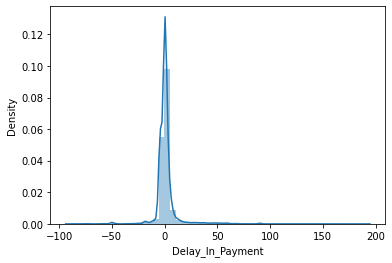

In [230]:
sns.distplot(df['Delay_In_Payment'])   #ploting delay

In [231]:
df.corr().loc['Delay_In_Payment',:]

buisness_year       -0.011699
doc_id               0.138952
total_open_amount   -0.011172
invoice_id           0.138952
isOpen                    NaN
Delay_In_Payment     1.000000
Name: Delay_In_Payment, dtype: float64

<AxesSubplot:xlabel='Delay_In_Payment', ylabel='due_in_date'>

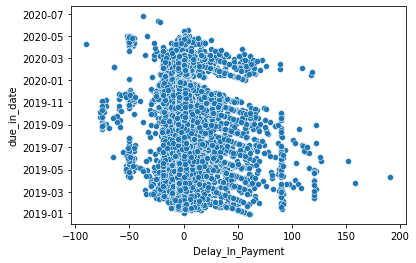

In [232]:
sns.scatterplot(data = df, x = "Delay_In_Payment", y = "due_in_date")

<AxesSubplot:xlabel='Delay_In_Payment', ylabel='total_open_amount'>

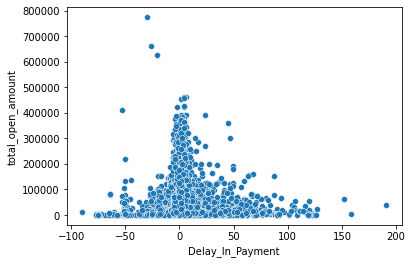

In [233]:
sns.scatterplot(data = df, x = "Delay_In_Payment", y = "total_open_amount")

In [234]:
df['Delay_In_Payment'].unique() 

array([ -4,   2,   0,   6,  -2,  -5,  32,   1,  -1,   4,  60,   5,   3,
       -30,  11,   8,   7,  38,  -3, -17,  -8,  31,  10,   9,  51, -13,
        67,  13, -11,  36,  30, -24,  90, 122,  49, -51,  12, -50,  20,
        -9,  26,  -7,  -6,  66,  33, -10,  24, -19,  14,  52,  17,  41,
        29, -49,  61,  42,  39,  40,  28, -12,  18,  23,  21,  35,  22,
        45, -25, -60,  44,  53,  47,  73,  15, -47,  48, -64, -46,  43,
        46,  27,  16, -23, -18, -16, -14, -15, 127,  37,  19,  34,  72,
        58, -75,  59,  25, 118,  50,  64,  56,  84, -48,  91,  65, -27,
        76, -36, -52,  94, -21, -26,  57,  55,  68, -32, -31, -20,  54,
       -33, 120, -53, 103, -34, 104, -29,  80, -77,  89, 106,  88, 107,
       -22,  69,  78, -74, -59, -35,  92, -90,  81, -39,  87,  74, -72,
       152, 101, -73, -45, -58, 116, 108,  62,  75, -69,  70, 191, -57,
       -65,  97, -28, -44, 110,  82, -37, 109,  71,  63, -40, -56, -38,
       113,  95, 158, -54, -61, 126,  77, 111,  83, 114, 119], d

In [235]:
df['cust_payment_terms'].value_counts()

NAA8    18331
NAH4    12103
CA10     3470
NAC6     1536
NAAX     1094
        ...  
NAM4        1
B112        1
NATV        1
NATH        1
NATX        1
Name: cust_payment_terms, Length: 67, dtype: int64

In [236]:
#as isOpen is now a constant coloumn
df.drop(['isOpen'], axis = 1, inplace=True)
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay_In_Payment
0,U001,0200769623,WAL-MAR co,2019-10-10,2019.0,1.929940e+09,2019-09-29,2019-09-29,2019-10-14,USD,26669.62,2019-09-29,NAH4,1.929940e+09,-4
1,CA02,0140105686,SYSC corp,2019-06-06,2019.0,2.960548e+09,2019-05-24,2019-05-24,2019-06-04,CAD,75231.42,2019-05-25,CA10,2.960548e+09,2
2,U001,0200974851,RESTA associates,2019-07-10,2019.0,1.929521e+09,2019-06-20,2019-06-20,2019-07-10,USD,2355.97,2019-06-20,NAD1,1.929521e+09,0
3,U001,0200742521,GLA corp,2019-04-09,2019.0,1.928970e+09,2019-03-14,2019-03-14,2019-04-03,USD,26251.35,2019-03-14,NAD1,1.928970e+09,6
4,U001,0200759878,SA systems,2019-09-23,2019.0,1.929832e+09,2019-09-06,2019-09-06,2019-09-21,USD,13768.73,2019-09-06,NAH4,1.929832e+09,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,U001,0200726979,BJ'S trust,2019-04-11,2019.0,1.929035e+09,2019-03-27,2019-03-27,2019-04-11,USD,207.66,2019-03-27,NAA8,1.929035e+09,0
45580,U001,0200721222,GO systems,2020-04-10,2020.0,1.930493e+09,2020-02-07,2020-02-07,2020-04-12,USD,7306.02,2020-02-07,NAGD,1.930493e+09,-2
45581,U001,0200794332,COST,2019-09-12,2019.0,1.929826e+09,2019-09-03,2019-09-03,2019-09-18,USD,8543.31,2019-09-03,NAAX,1.929826e+09,-6
45582,U001,0200769623,WAL-MAR us,2019-03-04,2019.0,1.928819e+09,2019-02-20,2019-02-20,2019-03-07,USD,12887.87,2019-02-20,NAH4,1.928819e+09,-3


In [237]:
#sorting with respect of document_create_date.1
df = df.sort_values(by = 'document_create_date.1') 

In [238]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay_In_Payment
32277,U001,0200772670,ASSOCIAT co,2019-01-15,2019.0,1.928544e+09,2018-12-30,2018-12-30,2019-01-14,USD,33567.82,2018-12-30,NAU5,1.928544e+09,1
23165,U001,0200769623,WAL-MAR us,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,23002.13,2018-12-30,NAH4,1.928541e+09,1
19273,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,14548.67,2018-12-30,NAH4,1.928541e+09,-5
29799,U001,0200769623,WAL-MAR us,2019-01-10,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,USD,386.66,2018-12-30,NAH4,1.928534e+09,-4
27653,U001,0200759878,SA us,2019-01-15,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,USD,41704.00,2018-12-30,NAH4,1.928534e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27384,U001,0200357714,US foundation,2020-03-13,2020.0,1.930581e+09,2020-02-27,2020-02-27,2020-03-13,USD,13783.54,2020-02-27,NAA8,1.930581e+09,0
28038,U001,0200759878,SA systems,2020-03-13,2020.0,1.930574e+09,2020-02-27,2020-02-27,2020-03-13,USD,63966.18,2020-02-27,NAH4,1.930574e+09,0
7223,U001,0200759878,SA in,2020-03-13,2020.0,1.930572e+09,2020-02-27,2020-02-27,2020-03-13,USD,70504.55,2020-02-27,NAH4,1.930572e+09,0
11800,U001,0200418007,AM us,2020-03-13,2020.0,1.930548e+09,2020-02-27,2020-02-27,2020-03-13,USD,4171.53,2020-02-27,NAA8,1.930548e+09,0


In [239]:
df.reset_index(drop=True, inplace=True)

In [240]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay_In_Payment
0,U001,0200772670,ASSOCIAT co,2019-01-15,2019.0,1.928544e+09,2018-12-30,2018-12-30,2019-01-14,USD,33567.82,2018-12-30,NAU5,1.928544e+09,1
1,U001,0200769623,WAL-MAR us,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,23002.13,2018-12-30,NAH4,1.928541e+09,1
2,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,14548.67,2018-12-30,NAH4,1.928541e+09,-5
3,U001,0200769623,WAL-MAR us,2019-01-10,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,USD,386.66,2018-12-30,NAH4,1.928534e+09,-4
4,U001,0200759878,SA us,2019-01-15,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,USD,41704.00,2018-12-30,NAH4,1.928534e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43535,U001,0200357714,US foundation,2020-03-13,2020.0,1.930581e+09,2020-02-27,2020-02-27,2020-03-13,USD,13783.54,2020-02-27,NAA8,1.930581e+09,0
43536,U001,0200759878,SA systems,2020-03-13,2020.0,1.930574e+09,2020-02-27,2020-02-27,2020-03-13,USD,63966.18,2020-02-27,NAH4,1.930574e+09,0
43537,U001,0200759878,SA in,2020-03-13,2020.0,1.930572e+09,2020-02-27,2020-02-27,2020-03-13,USD,70504.55,2020-02-27,NAH4,1.930572e+09,0
43538,U001,0200418007,AM us,2020-03-13,2020.0,1.930548e+09,2020-02-27,2020-02-27,2020-03-13,USD,4171.53,2020-02-27,NAA8,1.930548e+09,0


In [241]:
features = ['document_create_date.1', 'total_open_amount', 'clear_date','baseline_create_date', 'Delay_In_Payment']

In [242]:
X = df[features]

In [243]:
X.describe()

,total_open_amount,Delay_In_Payment
count,43540.000000,43540.000000
mean,33533.453692,1.082430
std,40622.794760,10.601507
min,1.880000,-90.000000
25%,5492.495000,-2.000000
50%,18296.650000,0.000000
75%,48625.305000,2.000000
max,773749.440000,191.000000


In [244]:
df # main data set after removing anomalies and NaN values

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay_In_Payment
0,U001,0200772670,ASSOCIAT co,2019-01-15,2019.0,1.928544e+09,2018-12-30,2018-12-30,2019-01-14,USD,33567.82,2018-12-30,NAU5,1.928544e+09,1
1,U001,0200769623,WAL-MAR us,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,23002.13,2018-12-30,NAH4,1.928541e+09,1
2,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,14548.67,2018-12-30,NAH4,1.928541e+09,-5
3,U001,0200769623,WAL-MAR us,2019-01-10,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,USD,386.66,2018-12-30,NAH4,1.928534e+09,-4
4,U001,0200759878,SA us,2019-01-15,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,USD,41704.00,2018-12-30,NAH4,1.928534e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43535,U001,0200357714,US foundation,2020-03-13,2020.0,1.930581e+09,2020-02-27,2020-02-27,2020-03-13,USD,13783.54,2020-02-27,NAA8,1.930581e+09,0
43536,U001,0200759878,SA systems,2020-03-13,2020.0,1.930574e+09,2020-02-27,2020-02-27,2020-03-13,USD,63966.18,2020-02-27,NAH4,1.930574e+09,0
43537,U001,0200759878,SA in,2020-03-13,2020.0,1.930572e+09,2020-02-27,2020-02-27,2020-03-13,USD,70504.55,2020-02-27,NAH4,1.930572e+09,0
43538,U001,0200418007,AM us,2020-03-13,2020.0,1.930548e+09,2020-02-27,2020-02-27,2020-03-13,USD,4171.53,2020-02-27,NAA8,1.930548e+09,0


In [245]:
#dataset seperated on basis of isOpen==1 and clear_date='Nan'
df1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
45585,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930767e+09,2020-04-09,20200409,20200424.0,USD,55983.51,20200409.0,NAH4,1.930767e+09,1
45586,U001,0200772670,ASSOCIAT co,NaN,2020.0,1.930682e+09,2020-03-20,20200320,20200404.0,USD,179.17,20200320.0,NAU5,1.930682e+09,1
45587,CA02,0140105847,GORDON F foundation,NaN,2020.0,2.960618e+09,2020-03-04,20200304,20200316.0,CAD,3587.75,20200306.0,CA10,2.960618e+09,1
45588,U001,0200900909,SYSCO foundation,NaN,2020.0,1.930585e+09,2020-03-03,20200303,20200318.0,USD,42548.09,20200303.0,NAA8,1.930585e+09,1
45589,U001,0200152991,JET co,NaN,2020.0,1.930842e+09,2020-04-30,20200430,20200515.0,USD,913.90,20200430.0,NAA8,1.930842e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200407025,ALBERT,NaN,2020.0,1.930802e+09,2020-04-23,20200423,20200508.0,USD,96963.22,20200423.0,NAA8,1.930802e+09,1
49996,U001,0200803720,DEC foundation,NaN,2020.0,1.930618e+09,2020-03-07,20200307,20200324.0,USD,35.44,20200301.0,NAM4,1.930618e+09,1
49997,U001,0200744019,TARG corp,NaN,2020.0,1.930584e+09,2020-02-29,20200229,20200315.0,USD,55612.86,20200229.0,NAA8,1.930584e+09,1
49998,U001,0200721222,GO systems,NaN,2020.0,1.930643e+09,2020-03-12,20200312,20200516.0,USD,21065.07,20200312.0,NAGD,1.930643e+09,1


In [246]:
#Sorted dataset in ascending order using document_create_date.1
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay_In_Payment
0,U001,0200772670,ASSOCIAT co,2019-01-15,2019.0,1.928544e+09,2018-12-30,2018-12-30,2019-01-14,USD,33567.82,2018-12-30,NAU5,1.928544e+09,1
1,U001,0200769623,WAL-MAR us,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,23002.13,2018-12-30,NAH4,1.928541e+09,1
2,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,14548.67,2018-12-30,NAH4,1.928541e+09,-5
3,U001,0200769623,WAL-MAR us,2019-01-10,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,USD,386.66,2018-12-30,NAH4,1.928534e+09,-4
4,U001,0200759878,SA us,2019-01-15,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,USD,41704.00,2018-12-30,NAH4,1.928534e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43535,U001,0200357714,US foundation,2020-03-13,2020.0,1.930581e+09,2020-02-27,2020-02-27,2020-03-13,USD,13783.54,2020-02-27,NAA8,1.930581e+09,0
43536,U001,0200759878,SA systems,2020-03-13,2020.0,1.930574e+09,2020-02-27,2020-02-27,2020-03-13,USD,63966.18,2020-02-27,NAH4,1.930574e+09,0
43537,U001,0200759878,SA in,2020-03-13,2020.0,1.930572e+09,2020-02-27,2020-02-27,2020-03-13,USD,70504.55,2020-02-27,NAH4,1.930572e+09,0
43538,U001,0200418007,AM us,2020-03-13,2020.0,1.930548e+09,2020-02-27,2020-02-27,2020-03-13,USD,4171.53,2020-02-27,NAA8,1.930548e+09,0


# TRAIN-TEST-VALIDATION SPLIT

In [247]:
#Data splitting into train validation and test set
#train and test on basis of isOpen
#train-> isOpen==0 and clear_date = not null
#test->  isOpen==1 and clear_date = NaN

In [248]:
#firstly, dividing the data into test set and train set 
#storing respective data set into train_data and test_data
train_data=df[df['clear_date'].isna()==False]
test_data=df1[df1['clear_date'].isna()==True]

In [249]:
test_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
45585,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930767e+09,2020-04-09,20200409,20200424.0,USD,55983.51,20200409.0,NAH4,1.930767e+09,1
45586,U001,0200772670,ASSOCIAT co,NaN,2020.0,1.930682e+09,2020-03-20,20200320,20200404.0,USD,179.17,20200320.0,NAU5,1.930682e+09,1
45587,CA02,0140105847,GORDON F foundation,NaN,2020.0,2.960618e+09,2020-03-04,20200304,20200316.0,CAD,3587.75,20200306.0,CA10,2.960618e+09,1
45588,U001,0200900909,SYSCO foundation,NaN,2020.0,1.930585e+09,2020-03-03,20200303,20200318.0,USD,42548.09,20200303.0,NAA8,1.930585e+09,1
45589,U001,0200152991,JET co,NaN,2020.0,1.930842e+09,2020-04-30,20200430,20200515.0,USD,913.90,20200430.0,NAA8,1.930842e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200407025,ALBERT,NaN,2020.0,1.930802e+09,2020-04-23,20200423,20200508.0,USD,96963.22,20200423.0,NAA8,1.930802e+09,1
49996,U001,0200803720,DEC foundation,NaN,2020.0,1.930618e+09,2020-03-07,20200307,20200324.0,USD,35.44,20200301.0,NAM4,1.930618e+09,1
49997,U001,0200744019,TARG corp,NaN,2020.0,1.930584e+09,2020-02-29,20200229,20200315.0,USD,55612.86,20200229.0,NAA8,1.930584e+09,1
49998,U001,0200721222,GO systems,NaN,2020.0,1.930643e+09,2020-03-12,20200312,20200516.0,USD,21065.07,20200312.0,NAGD,1.930643e+09,1


In [250]:
train_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay_In_Payment
0,U001,0200772670,ASSOCIAT co,2019-01-15,2019.0,1.928544e+09,2018-12-30,2018-12-30,2019-01-14,USD,33567.82,2018-12-30,NAU5,1.928544e+09,1
1,U001,0200769623,WAL-MAR us,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,23002.13,2018-12-30,NAH4,1.928541e+09,1
2,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,14548.67,2018-12-30,NAH4,1.928541e+09,-5
3,U001,0200769623,WAL-MAR us,2019-01-10,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,USD,386.66,2018-12-30,NAH4,1.928534e+09,-4
4,U001,0200759878,SA us,2019-01-15,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,USD,41704.00,2018-12-30,NAH4,1.928534e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43535,U001,0200357714,US foundation,2020-03-13,2020.0,1.930581e+09,2020-02-27,2020-02-27,2020-03-13,USD,13783.54,2020-02-27,NAA8,1.930581e+09,0
43536,U001,0200759878,SA systems,2020-03-13,2020.0,1.930574e+09,2020-02-27,2020-02-27,2020-03-13,USD,63966.18,2020-02-27,NAH4,1.930574e+09,0
43537,U001,0200759878,SA in,2020-03-13,2020.0,1.930572e+09,2020-02-27,2020-02-27,2020-03-13,USD,70504.55,2020-02-27,NAH4,1.930572e+09,0
43538,U001,0200418007,AM us,2020-03-13,2020.0,1.930548e+09,2020-02-27,2020-02-27,2020-03-13,USD,4171.53,2020-02-27,NAA8,1.930548e+09,0


In [251]:
#importing respective libraries for further split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

In [252]:
#dividing the train_set into train (70%)and validation set(30%)
#dropping the target coloumn as it has to predicted 
x_train,x_val,y_train,y_val = train_test_split(df.drop('Delay_In_Payment',axis=1),df['Delay_In_Payment'],test_size=0.3, random_state=None,shuffle= False)

print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)

(30478, 14) (30478,)
(13062, 14) (13062,)


In [253]:
x_train.tail()


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
30473,CA02,0140105686,SYSC llc,2019-11-07,2019.0,2.960585e+09,2019-10-08,2019-10-08,2019-10-26,CAD,6596.90,2019-10-16,CA10,2.960585e+09
30474,U001,0200769623,WAL-MAR systems,2019-10-18,2019.0,1.929983e+09,2019-10-08,2019-10-08,2019-10-23,USD,42182.22,2019-10-08,NAH4,1.929983e+09
30475,U001,0200418007,AM corp,2019-10-23,2019.0,1.929955e+09,2019-10-08,2019-10-08,2019-10-23,USD,1476.81,2019-10-08,NAA8,1.929955e+09
30476,U001,0100034022,GRECO llc,2019-10-23,2019.0,1.929987e+09,2019-10-08,2019-10-08,2019-10-23,USD,10686.40,2019-10-08,NAA8,1.929987e+09
30477,U001,0200769623,WAL-MAR foundation,2019-10-18,2019.0,1.929976e+09,2019-10-08,2019-10-08,2019-10-23,USD,1898.20,2019-10-08,NAH4,1.929976e+09


In [254]:
x_val.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
30478,U001,0200742791,QUI,2019-10-23,2019.0,1.929977e+09,2019-10-08,2019-10-08,2019-10-23,USD,74206.44,2019-10-08,NAA8,1.929977e+09
30479,U001,0200418007,AM foundation,2019-10-23,2019.0,1.929963e+09,2019-10-08,2019-10-08,2019-10-23,USD,1264.56,2019-10-08,NAA8,1.929963e+09
30480,U001,0200769623,WAL-MAR foundation,2019-10-18,2019.0,1.929976e+09,2019-10-08,2019-10-08,2019-10-23,USD,32663.02,2019-10-08,NAH4,1.929976e+09
30481,U001,0200769623,WAL-MAR trust,2019-10-18,2019.0,1.929977e+09,2019-10-08,2019-10-08,2019-10-23,USD,37839.94,2019-10-08,NAH4,1.929977e+09
30482,U001,0200769623,WAL-MAR co,2019-10-18,2019.0,1.929974e+09,2019-10-08,2019-10-08,2019-10-23,USD,69225.14,2019-10-08,NAH4,1.929974e+09


In [255]:
#dividing the validation set further into val1 (15%)and val2(15%)
#val1= used for hyperparameter tuning
#val2= which will be used as a local test set

val1,val2,x_val1,y_val2 = train_test_split(x_val, y_val ,test_size=0.5, random_state=None,shuffle= False)

print(val1.shape,x_val1.shape)
print(val2.shape,y_val2.shape)

(6531, 14) (6531,)
(6531, 14) (6531,)


In [256]:
val1.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
30478,U001,0200742791,QUI,2019-10-23,2019.0,1.929977e+09,2019-10-08,2019-10-08,2019-10-23,USD,74206.44,2019-10-08,NAA8,1.929977e+09
30479,U001,0200418007,AM foundation,2019-10-23,2019.0,1.929963e+09,2019-10-08,2019-10-08,2019-10-23,USD,1264.56,2019-10-08,NAA8,1.929963e+09
30480,U001,0200769623,WAL-MAR foundation,2019-10-18,2019.0,1.929976e+09,2019-10-08,2019-10-08,2019-10-23,USD,32663.02,2019-10-08,NAH4,1.929976e+09
30481,U001,0200769623,WAL-MAR trust,2019-10-18,2019.0,1.929977e+09,2019-10-08,2019-10-08,2019-10-23,USD,37839.94,2019-10-08,NAH4,1.929977e+09
30482,U001,0200769623,WAL-MAR co,2019-10-18,2019.0,1.929974e+09,2019-10-08,2019-10-08,2019-10-23,USD,69225.14,2019-10-08,NAH4,1.929974e+09


In [257]:
val1.tail()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
37004,U001,0200769623,WAL-MAR corp,2019-12-20,2019.0,1.930251e+09,2019-12-09,2019-12-09,2019-12-24,USD,19554.95,2019-12-09,NAH4,1.930251e+09
37005,CA02,0140104225,SAVE-ON- systems,2019-12-23,2019.0,2.960599e+09,2019-12-09,2019-12-09,2019-12-19,CAD,12505.35,2019-12-09,CA10,2.960599e+09
37006,U001,0200794332,COST trust,2019-12-23,2019.0,1.930230e+09,2019-12-09,2019-12-09,2019-12-24,USD,61646.90,2019-12-09,NAAX,1.930230e+09
37007,CA02,0140104423,METRO trust,2019-12-19,2019.0,2.960599e+09,2019-12-09,2019-12-09,2019-12-21,CAD,356590.93,2019-12-11,CA10,2.960599e+09
37008,U001,0100035971,BON foundation,2019-12-28,2019.0,1.930255e+09,2019-12-09,2019-12-09,2019-12-24,USD,60582.00,2019-12-09,NAA8,1.930255e+09


In [258]:
val2.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
37009,U001,0200762301,C&S WH associates,2019-12-24,2019.0,1.930254e+09,2019-12-09,2019-12-09,2019-12-24,USD,6996.69,2019-12-09,NAC6,1.930254e+09
37010,U001,0200927099,THE YOUN associates,2019-12-19,2019.0,1.930252e+09,2019-12-09,2019-12-09,2019-12-24,USD,11757.21,2019-12-09,NAA8,1.930252e+09
37011,U001,0200799367,MCL,2019-12-24,2019.0,1.930216e+09,2019-12-09,2019-12-09,2019-12-24,USD,29549.79,2019-12-09,NAA8,1.930216e+09
37012,U001,0200762301,C&S WH associates,2019-12-24,2019.0,1.930250e+09,2019-12-09,2019-12-09,2019-12-24,USD,8225.28,2019-12-09,NAC6,1.930250e+09
37013,U001,0200782669,SYGMA corp,2019-12-26,2019.0,1.930228e+09,2019-12-09,2019-12-09,2019-12-24,USD,13572.92,2019-12-09,NAA8,1.930228e+09


# EDA AND VISUALISATIONS

In [259]:
#EDA AND VISUALISATION

In [260]:
#working on x_train 
#finding x_train coloumns data types
x_train.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
dtype: object

In [261]:
len(x_train)

30478

In [262]:
len(x_val)

13062

In [263]:
#duplicate
a=x_train[x_train.duplicated()]
a.shape

(0, 14)

In [264]:
#any null values in the train set
print(x_train.isnull().any())

business_code             False
cust_number               False
name_customer             False
clear_date                False
buisness_year             False
doc_id                    False
posting_date              False
document_create_date.1    False
due_in_date               False
invoice_currency          False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                False
dtype: bool


<AxesSubplot:xlabel='Delay_In_Payment'>

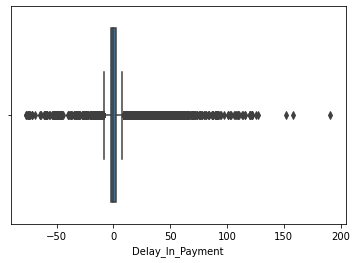

In [265]:
#checking for outliers in train set
sns.boxplot(x=y_train) 

In [266]:
Q1  = y_train.quantile(0.25)
Q3  = y_train.quantile(0.75)
IQR = Q3-Q1
IQR

4.0

In [267]:
#if any Delay_In_Payment is greater than 150 it would be considered
#as outlier and could affect our data
#removing the outliers

(y_train>150).value_counts()

False    30475
True         3
Name: Delay_In_Payment, dtype: int64

<AxesSubplot:xlabel='cust_payment_terms', ylabel='Delay_In_Payment'>

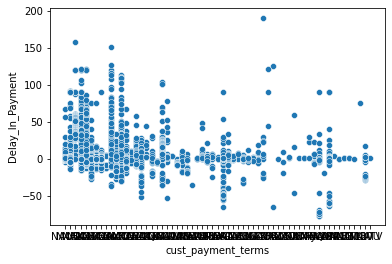

In [268]:
sns.scatterplot(data = x_train, x = x_train.cust_payment_terms, y = y_train)
#cust_payment_terms vary gradually with delay so it could be considered as a feature

<AxesSubplot:xlabel='due_in_date', ylabel='Delay_In_Payment'>

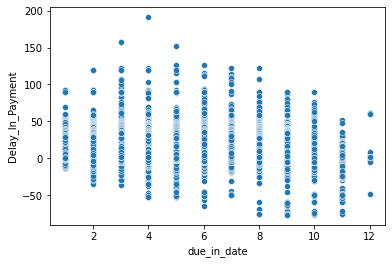

In [269]:
sns.scatterplot(x=x_train['due_in_date'].dt.month, y=y_train)
#checking delay with respect to due_date months

<AxesSubplot:xlabel='due_in_date', ylabel='Delay_In_Payment'>

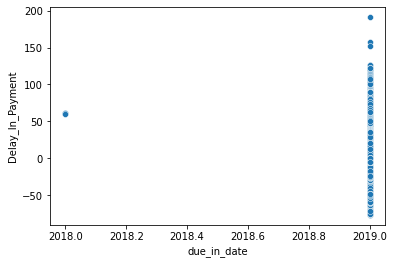

In [270]:
sns.scatterplot(x=x_train['due_in_date'].dt.year, y=y_train)
#checking delay with respect to due_date year
#by graph it is clear that most payments were made during same year

<AxesSubplot:xlabel='due_in_date', ylabel='Delay_In_Payment'>

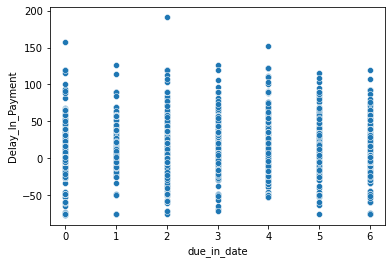

In [271]:
sns.scatterplot(x=x_train['due_in_date'].dt.weekday, y=y_train)
#checking delay with respect to due_date weekday
#monday=0 and sunday =6

<AxesSubplot:xlabel='due_in_date', ylabel='Delay_In_Payment'>

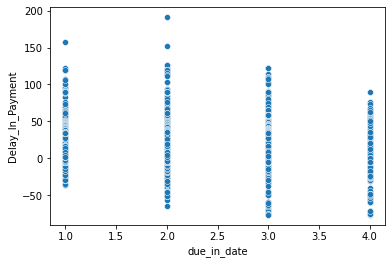

In [272]:
sns.scatterplot(x=x_train['due_in_date'].dt.quarter, y=y_train)
#checking delay with respect to quarter(in which it is due)

<AxesSubplot:xlabel='total_open_amount', ylabel='Delay_In_Payment'>

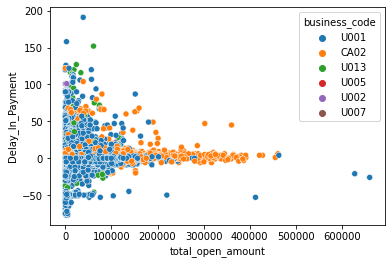

In [273]:
#following the graph we can see that CA02 are maximum large values
#also, U002 and U007 are compartively very less
#most of them are U001
sns.scatterplot(data = x_train, x = x_train.total_open_amount, y = y_train, hue=x_train.business_code)

In [274]:
#checking value counts in the business_code coloumn
#the lowest valuecount is of U007
x_train['business_code'].value_counts()

U001    27378
CA02     2546
U013      447
U002       97
U005        8
U007        2
Name: business_code, dtype: int64

In [275]:
x_train['total_open_amount_bins'],bins = pd.qcut(x_train['total_open_amount'],q=5,labels=['amt_1','amt_2','amt_3','amt_4','amt_5'],retbins=True)
x_train['total_open_amount_bins'].head() #binning the continues variable coulmn 'total_open_amt'

0    amt_4
1    amt_3
2    amt_3
3    amt_1
4    amt_4
Name: total_open_amount_bins, dtype: category
Categories (5, object): ['amt_1' < 'amt_2' < 'amt_3' < 'amt_4' < 'amt_5']

In [276]:
bins

array([1.8800000e+00, 3.2365160e+03, 1.3404670e+04, 2.6083312e+04,
       5.6387742e+04, 6.6020255e+05])

<AxesSubplot:xlabel='total_open_amount_bins', ylabel='Delay_In_Payment'>

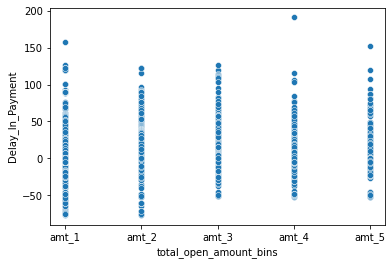

In [277]:
sns.scatterplot(x='total_open_amount_bins',y=y_train, data=x_train) #plotting bins with delay
# as amt is getting bigger delay is less

# FEATURE ENGINEERING

In [278]:
#feature engineering 
x_train


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,total_open_amount_bins
0,U001,0200772670,ASSOCIAT co,2019-01-15,2019.0,1.928544e+09,2018-12-30,2018-12-30,2019-01-14,USD,33567.82,2018-12-30,NAU5,1.928544e+09,amt_4
1,U001,0200769623,WAL-MAR us,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,23002.13,2018-12-30,NAH4,1.928541e+09,amt_3
2,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,14548.67,2018-12-30,NAH4,1.928541e+09,amt_3
3,U001,0200769623,WAL-MAR us,2019-01-10,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,USD,386.66,2018-12-30,NAH4,1.928534e+09,amt_1
4,U001,0200759878,SA us,2019-01-15,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,USD,41704.00,2018-12-30,NAH4,1.928534e+09,amt_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,CA02,0140105686,SYSC llc,2019-11-07,2019.0,2.960585e+09,2019-10-08,2019-10-08,2019-10-26,CAD,6596.90,2019-10-16,CA10,2.960585e+09,amt_2
30474,U001,0200769623,WAL-MAR systems,2019-10-18,2019.0,1.929983e+09,2019-10-08,2019-10-08,2019-10-23,USD,42182.22,2019-10-08,NAH4,1.929983e+09,amt_4
30475,U001,0200418007,AM corp,2019-10-23,2019.0,1.929955e+09,2019-10-08,2019-10-08,2019-10-23,USD,1476.81,2019-10-08,NAA8,1.929955e+09,amt_1
30476,U001,0100034022,GRECO llc,2019-10-23,2019.0,1.929987e+09,2019-10-08,2019-10-08,2019-10-23,USD,10686.40,2019-10-08,NAA8,1.929987e+09,amt_2


In [279]:
x_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,total_open_amount_bins
0,U001,0200772670,ASSOCIAT co,2019-01-15,2019.0,1.928544e+09,2018-12-30,2018-12-30,2019-01-14,USD,33567.82,2018-12-30,NAU5,1.928544e+09,amt_4
1,U001,0200769623,WAL-MAR us,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,23002.13,2018-12-30,NAH4,1.928541e+09,amt_3
2,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,14548.67,2018-12-30,NAH4,1.928541e+09,amt_3
3,U001,0200769623,WAL-MAR us,2019-01-10,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,USD,386.66,2018-12-30,NAH4,1.928534e+09,amt_1
4,U001,0200759878,SA us,2019-01-15,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,USD,41704.00,2018-12-30,NAH4,1.928534e+09,amt_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,CA02,0140105686,SYSC llc,2019-11-07,2019.0,2.960585e+09,2019-10-08,2019-10-08,2019-10-26,CAD,6596.90,2019-10-16,CA10,2.960585e+09,amt_2
30474,U001,0200769623,WAL-MAR systems,2019-10-18,2019.0,1.929983e+09,2019-10-08,2019-10-08,2019-10-23,USD,42182.22,2019-10-08,NAH4,1.929983e+09,amt_4
30475,U001,0200418007,AM corp,2019-10-23,2019.0,1.929955e+09,2019-10-08,2019-10-08,2019-10-23,USD,1476.81,2019-10-08,NAA8,1.929955e+09,amt_1
30476,U001,0100034022,GRECO llc,2019-10-23,2019.0,1.929987e+09,2019-10-08,2019-10-08,2019-10-23,USD,10686.40,2019-10-08,NAA8,1.929987e+09,amt_2


In [280]:
val1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
30478,U001,0200742791,QUI,2019-10-23,2019.0,1.929977e+09,2019-10-08,2019-10-08,2019-10-23,USD,74206.44,2019-10-08,NAA8,1.929977e+09
30479,U001,0200418007,AM foundation,2019-10-23,2019.0,1.929963e+09,2019-10-08,2019-10-08,2019-10-23,USD,1264.56,2019-10-08,NAA8,1.929963e+09
30480,U001,0200769623,WAL-MAR foundation,2019-10-18,2019.0,1.929976e+09,2019-10-08,2019-10-08,2019-10-23,USD,32663.02,2019-10-08,NAH4,1.929976e+09
30481,U001,0200769623,WAL-MAR trust,2019-10-18,2019.0,1.929977e+09,2019-10-08,2019-10-08,2019-10-23,USD,37839.94,2019-10-08,NAH4,1.929977e+09
30482,U001,0200769623,WAL-MAR co,2019-10-18,2019.0,1.929974e+09,2019-10-08,2019-10-08,2019-10-23,USD,69225.14,2019-10-08,NAH4,1.929974e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37004,U001,0200769623,WAL-MAR corp,2019-12-20,2019.0,1.930251e+09,2019-12-09,2019-12-09,2019-12-24,USD,19554.95,2019-12-09,NAH4,1.930251e+09
37005,CA02,0140104225,SAVE-ON- systems,2019-12-23,2019.0,2.960599e+09,2019-12-09,2019-12-09,2019-12-19,CAD,12505.35,2019-12-09,CA10,2.960599e+09
37006,U001,0200794332,COST trust,2019-12-23,2019.0,1.930230e+09,2019-12-09,2019-12-09,2019-12-24,USD,61646.90,2019-12-09,NAAX,1.930230e+09
37007,CA02,0140104423,METRO trust,2019-12-19,2019.0,2.960599e+09,2019-12-09,2019-12-09,2019-12-21,CAD,356590.93,2019-12-11,CA10,2.960599e+09


In [281]:
x_train['invoice_currency'].value_counts()

USD    27932
CAD     2546
Name: invoice_currency, dtype: int64

In [282]:
#major coloums are USD
#1 Canadian Dollar equals 0.78 United States Dollar so converting them
# total_open_amt multiplied by 0.78

In [283]:
x_train.total_open_amount=np.where(x_train['invoice_currency']=='CAD',0.78*x_train.total_open_amount,x_train.total_open_amount)
val1.total_open_amount=np.where(val1['invoice_currency']=='CAD',0.78*val1.total_open_amount,val1.total_open_amount)
val2.total_open_amount=np.where(val2['invoice_currency']=='CAD',0.78*val2.total_open_amount,val2.total_open_amount)

In [284]:
x_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,total_open_amount_bins
0,U001,0200772670,ASSOCIAT co,2019-01-15,2019.0,1.928544e+09,2018-12-30,2018-12-30,2019-01-14,USD,33567.820,2018-12-30,NAU5,1.928544e+09,amt_4
1,U001,0200769623,WAL-MAR us,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,23002.130,2018-12-30,NAH4,1.928541e+09,amt_3
2,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,14548.670,2018-12-30,NAH4,1.928541e+09,amt_3
3,U001,0200769623,WAL-MAR us,2019-01-10,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,USD,386.660,2018-12-30,NAH4,1.928534e+09,amt_1
4,U001,0200759878,SA us,2019-01-15,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,USD,41704.000,2018-12-30,NAH4,1.928534e+09,amt_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,CA02,0140105686,SYSC llc,2019-11-07,2019.0,2.960585e+09,2019-10-08,2019-10-08,2019-10-26,CAD,5145.582,2019-10-16,CA10,2.960585e+09,amt_2
30474,U001,0200769623,WAL-MAR systems,2019-10-18,2019.0,1.929983e+09,2019-10-08,2019-10-08,2019-10-23,USD,42182.220,2019-10-08,NAH4,1.929983e+09,amt_4
30475,U001,0200418007,AM corp,2019-10-23,2019.0,1.929955e+09,2019-10-08,2019-10-08,2019-10-23,USD,1476.810,2019-10-08,NAA8,1.929955e+09,amt_1
30476,U001,0100034022,GRECO llc,2019-10-23,2019.0,1.929987e+09,2019-10-08,2019-10-08,2019-10-23,USD,10686.400,2019-10-08,NAA8,1.929987e+09,amt_2


In [285]:
x_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,total_open_amount_bins
0,U001,0200772670,ASSOCIAT co,2019-01-15,2019.0,1.928544e+09,2018-12-30,2018-12-30,2019-01-14,USD,33567.820,2018-12-30,NAU5,1.928544e+09,amt_4
1,U001,0200769623,WAL-MAR us,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,23002.130,2018-12-30,NAH4,1.928541e+09,amt_3
2,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,14548.670,2018-12-30,NAH4,1.928541e+09,amt_3
3,U001,0200769623,WAL-MAR us,2019-01-10,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,USD,386.660,2018-12-30,NAH4,1.928534e+09,amt_1
4,U001,0200759878,SA us,2019-01-15,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,USD,41704.000,2018-12-30,NAH4,1.928534e+09,amt_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,CA02,0140105686,SYSC llc,2019-11-07,2019.0,2.960585e+09,2019-10-08,2019-10-08,2019-10-26,CAD,5145.582,2019-10-16,CA10,2.960585e+09,amt_2
30474,U001,0200769623,WAL-MAR systems,2019-10-18,2019.0,1.929983e+09,2019-10-08,2019-10-08,2019-10-23,USD,42182.220,2019-10-08,NAH4,1.929983e+09,amt_4
30475,U001,0200418007,AM corp,2019-10-23,2019.0,1.929955e+09,2019-10-08,2019-10-08,2019-10-23,USD,1476.810,2019-10-08,NAA8,1.929955e+09,amt_1
30476,U001,0100034022,GRECO llc,2019-10-23,2019.0,1.929987e+09,2019-10-08,2019-10-08,2019-10-23,USD,10686.400,2019-10-08,NAA8,1.929987e+09,amt_2


In [286]:
# Now as the amt is normalized we can drop currency column

x_train.drop(['invoice_currency'], axis = 1, inplace=True)
val1.drop(['invoice_currency'], axis = 1, inplace=True)
val2.drop(['invoice_currency'], axis = 1, inplace=True)

In [287]:
x_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,total_open_amount_bins
0,U001,0200772670,ASSOCIAT co,2019-01-15,2019.0,1.928544e+09,2018-12-30,2018-12-30,2019-01-14,33567.820,2018-12-30,NAU5,1.928544e+09,amt_4
1,U001,0200769623,WAL-MAR us,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,23002.130,2018-12-30,NAH4,1.928541e+09,amt_3
2,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,14548.670,2018-12-30,NAH4,1.928541e+09,amt_3
3,U001,0200769623,WAL-MAR us,2019-01-10,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,386.660,2018-12-30,NAH4,1.928534e+09,amt_1
4,U001,0200759878,SA us,2019-01-15,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,41704.000,2018-12-30,NAH4,1.928534e+09,amt_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,CA02,0140105686,SYSC llc,2019-11-07,2019.0,2.960585e+09,2019-10-08,2019-10-08,2019-10-26,5145.582,2019-10-16,CA10,2.960585e+09,amt_2
30474,U001,0200769623,WAL-MAR systems,2019-10-18,2019.0,1.929983e+09,2019-10-08,2019-10-08,2019-10-23,42182.220,2019-10-08,NAH4,1.929983e+09,amt_4
30475,U001,0200418007,AM corp,2019-10-23,2019.0,1.929955e+09,2019-10-08,2019-10-08,2019-10-23,1476.810,2019-10-08,NAA8,1.929955e+09,amt_1
30476,U001,0100034022,GRECO llc,2019-10-23,2019.0,1.929987e+09,2019-10-08,2019-10-08,2019-10-23,10686.400,2019-10-08,NAA8,1.929987e+09,amt_2


In [288]:
x_train.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
total_open_amount_bins          category
dtype: object

In [289]:
#duplicate coloumn
x_train['doc_id'].corr(x_train['invoice_id']) 

1.0

In [290]:
#converting cust_number column into int
x_train['cust_number'] = x_train['cust_number'].str.extract('(\d+)').astype(int)
val1['cust_number'] = val1['cust_number'].str.extract('(\d+)').astype(int)
val2['cust_number'] = val2['cust_number'].str.extract('(\d+)').astype(int)

In [291]:
#extracting 
x_train['month_due_in_date'] = x_train['due_in_date'].dt.month
val1['month_due_in_date'] = val1['due_in_date'].dt.month
val2['month_due_in_date'] = val2['due_in_date'].dt.month

In [292]:
x_train['day_due_in_date'] = x_train['due_in_date'].dt.day
val1['day_due_in_date'] = val1['due_in_date'].dt.day
val2['day_due_in_date'] = val2['due_in_date'].dt.day

In [293]:
x_train['weekday_due_in_date'] = x_train['due_in_date'].dt.weekday
val1['weekday_due_in_date'] = val1['due_in_date'].dt.weekday
val2['weekday_due_in_date'] = val2['due_in_date'].dt.weekday

In [294]:
x_train['quarter_due_in_date'] = x_train['due_in_date'].dt.quarter
val1['quarter_due_in_date'] = val1['due_in_date'].dt.quarter
val2['quarter_due_in_date'] = val2['due_in_date'].dt.quarter

In [295]:
x_train['month_due_in_date']

0         1
1         1
2         1
3         1
4         1
         ..
30473    10
30474    10
30475    10
30476    10
30477    10
Name: month_due_in_date, Length: 30478, dtype: int64

In [296]:
#label encoding
def label_encoding(l):
    
    from sklearn import preprocessing 
    label_encoder = preprocessing.LabelEncoder()

    x_train[l]= label_encoder.fit_transform(x_train[l])

    val1[l]= label_encoder.fit_transform(val1[l]) 
    val2[l]= label_encoder.fit_transform(val2[l])

la=['business_code']

lk=pd.Series(la)

lk.apply(label_encoding)

0    None
dtype: object

In [297]:
x_train.dtypes

business_code                      int32
cust_number                        int32
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
total_open_amount_bins          category
month_due_in_date                  int64
day_due_in_date                    int64
weekday_due_in_date                int64
quarter_due_in_date                int64
dtype: object

In [298]:
val1.dtypes

business_code                      int32
cust_number                        int32
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
month_due_in_date                  int64
day_due_in_date                    int64
weekday_due_in_date                int64
quarter_due_in_date                int64
dtype: object

In [299]:
x_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,total_open_amount_bins,month_due_in_date,day_due_in_date,weekday_due_in_date,quarter_due_in_date
0,1,200772670,ASSOCIAT co,2019-01-15,2019.0,1.928544e+09,2018-12-30,2018-12-30,2019-01-14,33567.820,2018-12-30,NAU5,1.928544e+09,amt_4,1,14,0,1
1,1,200769623,WAL-MAR us,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,23002.130,2018-12-30,NAH4,1.928541e+09,amt_3,1,14,0,1
2,1,200769623,WAL-MAR corp,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,14548.670,2018-12-30,NAH4,1.928541e+09,amt_3,1,14,0,1
3,1,200769623,WAL-MAR us,2019-01-10,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,386.660,2018-12-30,NAH4,1.928534e+09,amt_1,1,14,0,1
4,1,200759878,SA us,2019-01-15,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,41704.000,2018-12-30,NAH4,1.928534e+09,amt_4,1,14,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,0,140105686,SYSC llc,2019-11-07,2019.0,2.960585e+09,2019-10-08,2019-10-08,2019-10-26,5145.582,2019-10-16,CA10,2.960585e+09,amt_2,10,26,5,4
30474,1,200769623,WAL-MAR systems,2019-10-18,2019.0,1.929983e+09,2019-10-08,2019-10-08,2019-10-23,42182.220,2019-10-08,NAH4,1.929983e+09,amt_4,10,23,2,4
30475,1,200418007,AM corp,2019-10-23,2019.0,1.929955e+09,2019-10-08,2019-10-08,2019-10-23,1476.810,2019-10-08,NAA8,1.929955e+09,amt_1,10,23,2,4
30476,1,100034022,GRECO llc,2019-10-23,2019.0,1.929987e+09,2019-10-08,2019-10-08,2019-10-23,10686.400,2019-10-08,NAA8,1.929987e+09,amt_2,10,23,2,4


In [300]:
x_train['day_create_date'] = x_train['document_create_date.1'].dt.day
val1['day_create_date'] = val1['document_create_date.1'].dt.day
val2['day_create_date'] = val2['document_create_date.1'].dt.day

x_train['quarter_create_date'] = x_train['document_create_date.1'].dt.quarter
val1['quarter_create_date'] = val1['document_create_date.1'].dt.quarter
val2['quarter_create_date'] = val2['document_create_date.1'].dt.quarter

x_train['month_create_date'] = x_train['document_create_date.1'].dt.month
val1['month_create_date'] = val1['document_create_date.1'].dt.month
val2['month_create_date'] = val2['document_create_date.1'].dt.month

In [301]:
x_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,...,cust_payment_terms,invoice_id,total_open_amount_bins,month_due_in_date,day_due_in_date,weekday_due_in_date,quarter_due_in_date,day_create_date,quarter_create_date,month_create_date
0,1,200772670,ASSOCIAT co,2019-01-15,2019.0,1.928544e+09,2018-12-30,2018-12-30,2019-01-14,33567.820,...,NAU5,1.928544e+09,amt_4,1,14,0,1,30,4,12
1,1,200769623,WAL-MAR us,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,23002.130,...,NAH4,1.928541e+09,amt_3,1,14,0,1,30,4,12
2,1,200769623,WAL-MAR corp,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,14548.670,...,NAH4,1.928541e+09,amt_3,1,14,0,1,30,4,12
3,1,200769623,WAL-MAR us,2019-01-10,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,386.660,...,NAH4,1.928534e+09,amt_1,1,14,0,1,30,4,12
4,1,200759878,SA us,2019-01-15,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,41704.000,...,NAH4,1.928534e+09,amt_4,1,14,0,1,30,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,0,140105686,SYSC llc,2019-11-07,2019.0,2.960585e+09,2019-10-08,2019-10-08,2019-10-26,5145.582,...,CA10,2.960585e+09,amt_2,10,26,5,4,8,4,10
30474,1,200769623,WAL-MAR systems,2019-10-18,2019.0,1.929983e+09,2019-10-08,2019-10-08,2019-10-23,42182.220,...,NAH4,1.929983e+09,amt_4,10,23,2,4,8,4,10
30475,1,200418007,AM corp,2019-10-23,2019.0,1.929955e+09,2019-10-08,2019-10-08,2019-10-23,1476.810,...,NAA8,1.929955e+09,amt_1,10,23,2,4,8,4,10
30476,1,100034022,GRECO llc,2019-10-23,2019.0,1.929987e+09,2019-10-08,2019-10-08,2019-10-23,10686.400,...,NAA8,1.929987e+09,amt_2,10,23,2,4,8,4,10


In [302]:
val1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,month_due_in_date,day_due_in_date,weekday_due_in_date,quarter_due_in_date,day_create_date,quarter_create_date,month_create_date
30478,1,200742791,QUI,2019-10-23,2019.0,1.929977e+09,2019-10-08,2019-10-08,2019-10-23,74206.4400,2019-10-08,NAA8,1.929977e+09,10,23,2,4,8,4,10
30479,1,200418007,AM foundation,2019-10-23,2019.0,1.929963e+09,2019-10-08,2019-10-08,2019-10-23,1264.5600,2019-10-08,NAA8,1.929963e+09,10,23,2,4,8,4,10
30480,1,200769623,WAL-MAR foundation,2019-10-18,2019.0,1.929976e+09,2019-10-08,2019-10-08,2019-10-23,32663.0200,2019-10-08,NAH4,1.929976e+09,10,23,2,4,8,4,10
30481,1,200769623,WAL-MAR trust,2019-10-18,2019.0,1.929977e+09,2019-10-08,2019-10-08,2019-10-23,37839.9400,2019-10-08,NAH4,1.929977e+09,10,23,2,4,8,4,10
30482,1,200769623,WAL-MAR co,2019-10-18,2019.0,1.929974e+09,2019-10-08,2019-10-08,2019-10-23,69225.1400,2019-10-08,NAH4,1.929974e+09,10,23,2,4,8,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37004,1,200769623,WAL-MAR corp,2019-12-20,2019.0,1.930251e+09,2019-12-09,2019-12-09,2019-12-24,19554.9500,2019-12-09,NAH4,1.930251e+09,12,24,1,4,9,4,12
37005,0,140104225,SAVE-ON- systems,2019-12-23,2019.0,2.960599e+09,2019-12-09,2019-12-09,2019-12-19,9754.1730,2019-12-09,CA10,2.960599e+09,12,19,3,4,9,4,12
37006,1,200794332,COST trust,2019-12-23,2019.0,1.930230e+09,2019-12-09,2019-12-09,2019-12-24,61646.9000,2019-12-09,NAAX,1.930230e+09,12,24,1,4,9,4,12
37007,0,140104423,METRO trust,2019-12-19,2019.0,2.960599e+09,2019-12-09,2019-12-09,2019-12-21,278140.9254,2019-12-11,CA10,2.960599e+09,12,21,5,4,9,4,12


In [303]:
#target encoding
dataf = pd.concat([x_train,y_train],axis=1)  
map_cust=df.groupby("cust_payment_terms")['Delay_In_Payment'].mean().to_dict()
# target mapping on cust_payment_terms

In [304]:
x_train['cust_payment_terms_target']=dataf['cust_payment_terms'].map(map_cust)
val1['cust_payment_terms_target']=val1['cust_payment_terms'].map(map_cust)
val1['cust_payment_terms_target'][val1['cust_payment_terms_target'].isnull()]= y_train.mean()
val2['cust_payment_terms_target']=val2['cust_payment_terms'].map(map_cust)
val2['cust_payment_terms_target'][val2['cust_payment_terms_target'].isnull()]= y_train.mean()

In [305]:
x_train.drop('cust_payment_terms',axis=1,inplace=True)
val1.drop('cust_payment_terms',axis=1,inplace=True)
val2.drop('cust_payment_terms',axis=1,inplace=True)

In [306]:
x_train.dtypes

business_code                         int32
cust_number                           int32
name_customer                        object
clear_date                   datetime64[ns]
buisness_year                       float64
doc_id                              float64
posting_date                 datetime64[ns]
document_create_date.1       datetime64[ns]
due_in_date                  datetime64[ns]
total_open_amount                   float64
baseline_create_date         datetime64[ns]
invoice_id                          float64
total_open_amount_bins             category
month_due_in_date                     int64
day_due_in_date                       int64
weekday_due_in_date                   int64
quarter_due_in_date                   int64
day_create_date                       int64
quarter_create_date                   int64
month_create_date                     int64
cust_payment_terms_target           float64
dtype: object

In [307]:
def drop(l):   #creating a custom func for dropping the column
    x_train.drop(l,axis=1,inplace=True)
    val1.drop(l,axis=1,inplace=True)
    val2.drop(l,axis=1,inplace=True)

In [308]:
for i in list(['name_customer','clear_date','posting_date','document_create_date.1','due_in_date','baseline_create_date']):
    drop(i)

In [309]:
x_train

,business_code,cust_number,buisness_year,doc_id,total_open_amount,invoice_id,total_open_amount_bins,month_due_in_date,day_due_in_date,weekday_due_in_date,quarter_due_in_date,day_create_date,quarter_create_date,month_create_date,cust_payment_terms_target
0,1,200772670,2019.0,1.928544e+09,33567.820,1.928544e+09,amt_4,1,14,0,1,30,4,12,1.269737
1,1,200769623,2019.0,1.928541e+09,23002.130,1.928541e+09,amt_3,1,14,0,1,30,4,12,-1.917954
2,1,200769623,2019.0,1.928541e+09,14548.670,1.928541e+09,amt_3,1,14,0,1,30,4,12,-1.917954
3,1,200769623,2019.0,1.928534e+09,386.660,1.928534e+09,amt_1,1,14,0,1,30,4,12,-1.917954
4,1,200759878,2019.0,1.928534e+09,41704.000,1.928534e+09,amt_4,1,14,0,1,30,4,12,-1.917954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,0,140105686,2019.0,2.960585e+09,5145.582,2.960585e+09,amt_2,10,26,5,4,8,4,10,5.965130
30474,1,200769623,2019.0,1.929983e+09,42182.220,1.929983e+09,amt_4,10,23,2,4,8,4,10,-1.917954
30475,1,200418007,2019.0,1.929955e+09,1476.810,1.929955e+09,amt_1,10,23,2,4,8,4,10,1.322732
30476,1,100034022,2019.0,1.929987e+09,10686.400,1.929987e+09,amt_2,10,23,2,4,8,4,10,1.322732


In [310]:
x_train.drop(['total_open_amount_bins'], axis = 1, inplace=True)

In [311]:
x_train.dtypes

business_code                  int32
cust_number                    int32
buisness_year                float64
doc_id                       float64
total_open_amount            float64
invoice_id                   float64
month_due_in_date              int64
day_due_in_date                int64
weekday_due_in_date            int64
quarter_due_in_date            int64
day_create_date                int64
quarter_create_date            int64
month_create_date              int64
cust_payment_terms_target    float64
dtype: object

In [312]:
x_train.shape

(30478, 14)

In [313]:
val1.dtypes

business_code                  int32
cust_number                    int32
buisness_year                float64
doc_id                       float64
total_open_amount            float64
invoice_id                   float64
month_due_in_date              int64
day_due_in_date                int64
weekday_due_in_date            int64
quarter_due_in_date            int64
day_create_date                int64
quarter_create_date            int64
month_create_date              int64
cust_payment_terms_target    float64
dtype: object

In [314]:
val1.shape

(6531, 14)

In [315]:
val2.shape

(6531, 14)

In [316]:
val2

,business_code,cust_number,buisness_year,doc_id,total_open_amount,invoice_id,month_due_in_date,day_due_in_date,weekday_due_in_date,quarter_due_in_date,day_create_date,quarter_create_date,month_create_date,cust_payment_terms_target
37009,1,200762301,2019.0,1.930254e+09,6996.69,1.930254e+09,12,24,1,4,9,4,12,0.500000
37010,1,200927099,2019.0,1.930252e+09,11757.21,1.930252e+09,12,24,1,4,9,4,12,1.322732
37011,1,200799367,2019.0,1.930216e+09,29549.79,1.930216e+09,12,24,1,4,9,4,12,1.322732
37012,1,200762301,2019.0,1.930250e+09,8225.28,1.930250e+09,12,24,1,4,9,4,12,0.500000
37013,1,200782669,2019.0,1.930228e+09,13572.92,1.930228e+09,12,24,1,4,9,4,12,1.322732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43535,1,200357714,2020.0,1.930581e+09,13783.54,1.930581e+09,3,13,4,1,27,1,2,1.322732
43536,1,200759878,2020.0,1.930574e+09,63966.18,1.930574e+09,3,13,4,1,27,1,2,-1.917954
43537,1,200759878,2020.0,1.930572e+09,70504.55,1.930572e+09,3,13,4,1,27,1,2,-1.917954
43538,1,200418007,2020.0,1.930548e+09,4171.53,1.930548e+09,3,13,4,1,27,1,2,1.322732


# FEATURE SELECTION

In [317]:
#feature selection

In [318]:
#filter method
#checking quasi constant feature
#Passing a value of zero for the parameter will filter all the features with zero variance
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(x_train)
#the number of non-constant features.
len(x_train.columns[constant_filter.get_support()])

13

In [319]:
constant_columns = [column for column in x_train.columns
                    if column not in x_train.columns[constant_filter.get_support()]]

print(len(constant_columns))

1


In [320]:
constant_columns

['buisness_year']

In [321]:
#checking duplicate features
# transpose the feature matrice
x_train_T = x_train.T
# print the number of duplicated features
print(x_train_T.duplicated().sum())
# select the duplicated features columns names
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

1


In [322]:
duplicated_columns

array(['invoice_id'], dtype=object)

<AxesSubplot:>

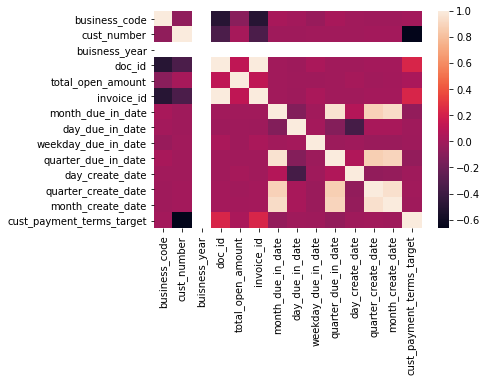

In [323]:
#plotiing of heat map
sns.heatmap(x_train.corr()) 

In [324]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

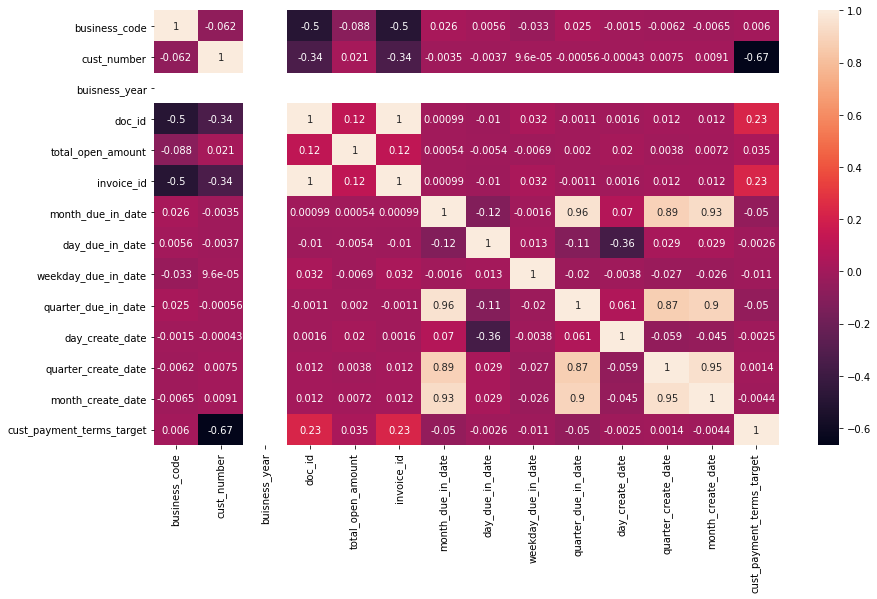

In [325]:
#visualisation
corr=x_train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True)

In [326]:
for i in list(['invoice_id','buisness_year','doc_id']):
    drop(i)

In [327]:
def FFS(X,y):
    from mlxtend.feature_selection import SequentialFeatureSelector as SFS
    from sklearn.linear_model import LinearRegression
    # Sequential Forward Selection(sfs)
    sfs = SFS(LinearRegression(),
              k_features=10,
              forward=True,
              scoring = 'r2',
              cv = 5)

    sfs.fit(X, y)#doing the FFS
    
    return sfs.k_feature_names_

In [328]:
#features selected by FFS
FFS(x_train,y_train)

('business_code',
 'cust_number',
 'total_open_amount',
 'day_due_in_date',
 'weekday_due_in_date',
 'quarter_due_in_date',
 'day_create_date',
 'quarter_create_date',
 'month_create_date',
 'cust_payment_terms_target')

In [329]:
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh')  
    return final_df

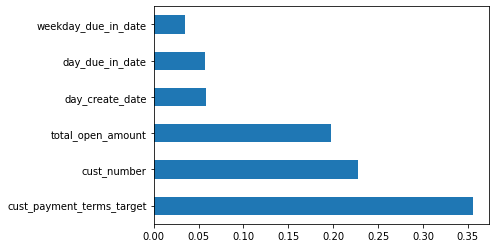

In [330]:
feature_importance=tree_based_feature_importance(x_train,y_train)#features importance data frame


In [331]:
x_train.head(10)

,business_code,cust_number,total_open_amount,month_due_in_date,day_due_in_date,weekday_due_in_date,quarter_due_in_date,day_create_date,quarter_create_date,month_create_date,cust_payment_terms_target
0,1,200772670,33567.82,1,14,0,1,30,4,12,1.269737
1,1,200769623,23002.13,1,14,0,1,30,4,12,-1.917954
2,1,200769623,14548.67,1,14,0,1,30,4,12,-1.917954
3,1,200769623,386.66,1,14,0,1,30,4,12,-1.917954
4,1,200759878,41704.00,1,14,0,1,30,4,12,-1.917954
5,1,200769623,55170.17,1,14,0,1,30,4,12,-1.917954
6,1,200769623,9785.88,1,14,0,1,30,4,12,-1.917954
7,1,200769623,49247.53,1,14,0,1,30,4,12,-1.917954
8,1,200769623,15898.07,1,14,0,1,30,4,12,-1.917954
9,1,200769623,45659.16,1,14,0,1,30,4,12,-1.917954


In [332]:
val1.head(10)

,business_code,cust_number,total_open_amount,month_due_in_date,day_due_in_date,weekday_due_in_date,quarter_due_in_date,day_create_date,quarter_create_date,month_create_date,cust_payment_terms_target
30478,1,200742791,74206.44,10,23,2,4,8,4,10,1.322732
30479,1,200418007,1264.56,10,23,2,4,8,4,10,1.322732
30480,1,200769623,32663.02,10,23,2,4,8,4,10,-1.917954
30481,1,200769623,37839.94,10,23,2,4,8,4,10,-1.917954
30482,1,200769623,69225.14,10,23,2,4,8,4,10,-1.917954
30483,4,3411,3240.96,11,22,4,4,8,4,10,19.282609
30484,1,200486270,10143.20,10,23,2,4,8,4,10,1.322732
30485,1,200792734,82909.78,10,23,2,4,8,4,10,1.322732
30486,1,200078795,3767.59,10,23,2,4,8,4,10,1.322732
30487,4,140103409,14023.58,11,7,3,4,8,4,10,-0.043137


In [333]:
val2.head(10)

,business_code,cust_number,total_open_amount,month_due_in_date,day_due_in_date,weekday_due_in_date,quarter_due_in_date,day_create_date,quarter_create_date,month_create_date,cust_payment_terms_target
37009,1,200762301,6996.69,12,24,1,4,9,4,12,0.500000
37010,1,200927099,11757.21,12,24,1,4,9,4,12,1.322732
37011,1,200799367,29549.79,12,24,1,4,9,4,12,1.322732
37012,1,200762301,8225.28,12,24,1,4,9,4,12,0.500000
37013,1,200782669,13572.92,12,24,1,4,9,4,12,1.322732
37014,1,200936373,19295.30,12,24,1,4,9,4,12,1.322732
37015,1,200769623,10412.64,12,24,1,4,9,4,12,-1.917954
37016,1,200769623,2373.96,12,24,1,4,9,4,12,-1.917954
37017,1,200357714,27752.06,12,24,1,4,9,4,12,1.322732
37018,1,200434439,51809.82,12,24,1,4,9,4,12,1.322732


In [334]:
#final features selected
#features = ['business_code','cust_number','total_open_amount','day_due_in_date','weekday_due_in_date','quarter_due_in_date','day_create_date','quarter_create_date','month_create_date','cust_payment_terms_target']

In [335]:
#final features selected
features = ['business_code','cust_number','total_open_amount','quarter_due_in_date','day_due_in_date','month_create_date','quarter_create_date','cust_payment_terms_target']

# CHECKING SCORES AFTER FINAL FEATURE SELECTION

In [336]:
from sklearn.linear_model import LinearRegression #importing model
clf = LinearRegression()
clf.fit(x_train[features], y_train)  #fitting 

# Predicting the Test Set Results
predicted = clf.predict(val1[features])  #predicting
predicted = np.floor(predicted)    # rounding off

In [337]:
#finding MAE, MSE, RMSE
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(x_val1, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(x_val1, predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(x_val1, predicted)))

Mean Absolute Error: 2.9611085591792987
Mean Squared Error: 26.99418159546777
Root Mean Squared Error: 5.195592516303388


In [338]:
#finding r2 score
from sklearn.metrics import r2_score
print(r2_score(x_val1, predicted))

0.4215925416110813


RANDOM FOREST

In [339]:
#MSE_Score = []
#R2_Score = []
Algorithm = []

In [340]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train[features])
val1 = sc.transform(val1[features])

In [341]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, max_depth=150, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(val1)

In [342]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(x_val1, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(x_val1, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(x_val1, y_pred)))

Mean Absolute Error: 3.2893410614335052
Mean Squared Error: 33.37034576233857
Root Mean Squared Error: 5.776707172978268


In [343]:
from sklearn.metrics import r2_score
print(r2_score(x_val1, predicted))

0.4215925416110813


SVR

In [344]:
#from sklearn.svm import SVR
#Algorithm.append('Support Vector Regression')
#clf = SVR()
#clf.fit(x_train[features], y_train)

 #Predicting the Test Set Results
#predicted= clf.predict(val1[features])
#predicted = np.floor(predicted) 

In [345]:
#from sklearn import metrics
#print('Mean Absolute Error:', metrics.mean_absolute_error(x_val1, predicted))
#print('Mean Squared Error:', metrics.mean_squared_error(x_val1, predicted))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(x_val1, predicted)))

In [346]:
#from sklearn.metrics import r2_score
#print(r2_score(x_val1, predicted))

In [347]:
#prediction on local test set
#pr= clf.predict(val2[features])
#pr = np.floor(pr)

In [348]:
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_val2, pr))
#print('Mean Squared Error:', metrics.mean_squared_error(y_val2, pr))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val2, pr)))

In [349]:
#print(r2_score(y_val2, pr))

DECISION TREE

In [350]:
#from sklearn.tree import DecisionTreeRegressor
#Algorithm.append('Decision Tree Regressor')
#clf = DecisionTreeRegressor()
#clf.fit(x_train, y_train)

#pred = clf.predict(val1)

In [351]:
#print('Mean Absolute Error:', metrics.mean_absolute_error(x_val1, pred))
#print('Mean Squared Error:', metrics.mean_squared_error(x_val1, pred))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(x_val1, pred)))

In [352]:
#from sklearn.metrics import r2_score
#print(r2_score(x_val1, pred))

5 XG BOOST

In [353]:
#import xgboost as xgb
#Algorithm.append('XGB Regressor')
#clf = xgb.XGBRegressor()
#clf.fit(x_train, y_train)

# Predicting the Test Set Results
#predict = clf.predict(val1)

In [354]:
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_val2, predict))
#print('Mean Squared Error:', metrics.mean_squared_error(y_val2, predict))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val2, predict)))

In [355]:
#from sklearn.metrics import r2_score
#print(r2_score(y_val2, predict))

# CHECKING SCORES ON LOCAL TEST SET(VAL2)

In [356]:
pr = clf.predict(val2[features])

In [357]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val2, pr))
print('Mean Squared Error:', metrics.mean_squared_error(y_val2, pr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val2, pr)))

Mean Absolute Error: 3.7732071190123886
Mean Squared Error: 63.07083366910452
Root Mean Squared Error: 7.941714781399829


In [358]:
from sklearn.metrics import r2_score
print(r2_score(y_val2, pr))

0.3633634720956358


# WORKING ON TEST SET

In [359]:
#test set
test_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
45585,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930767e+09,2020-04-09,20200409,20200424.0,USD,55983.51,20200409.0,NAH4,1.930767e+09,1
45586,U001,0200772670,ASSOCIAT co,NaN,2020.0,1.930682e+09,2020-03-20,20200320,20200404.0,USD,179.17,20200320.0,NAU5,1.930682e+09,1
45587,CA02,0140105847,GORDON F foundation,NaN,2020.0,2.960618e+09,2020-03-04,20200304,20200316.0,CAD,3587.75,20200306.0,CA10,2.960618e+09,1
45588,U001,0200900909,SYSCO foundation,NaN,2020.0,1.930585e+09,2020-03-03,20200303,20200318.0,USD,42548.09,20200303.0,NAA8,1.930585e+09,1
45589,U001,0200152991,JET co,NaN,2020.0,1.930842e+09,2020-04-30,20200430,20200515.0,USD,913.90,20200430.0,NAA8,1.930842e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200407025,ALBERT,NaN,2020.0,1.930802e+09,2020-04-23,20200423,20200508.0,USD,96963.22,20200423.0,NAA8,1.930802e+09,1
49996,U001,0200803720,DEC foundation,NaN,2020.0,1.930618e+09,2020-03-07,20200307,20200324.0,USD,35.44,20200301.0,NAM4,1.930618e+09,1
49997,U001,0200744019,TARG corp,NaN,2020.0,1.930584e+09,2020-02-29,20200229,20200315.0,USD,55612.86,20200229.0,NAA8,1.930584e+09,1
49998,U001,0200721222,GO systems,NaN,2020.0,1.930643e+09,2020-03-12,20200312,20200516.0,USD,21065.07,20200312.0,NAGD,1.930643e+09,1


In [360]:
#factorizing business code
test_data['business_code']= pd.factorize(test_data['business_code'])[0]

In [361]:
#converting cust_number into int
test_data['cust_number'] = test_data['cust_number'].str.extract('(\d+)').astype(int)

In [362]:
#changing to datetime format
import datetime as dt
test_data['due_in_date'] = pd.to_datetime(test_data['due_in_date'], format = '%Y%m%d').dt.strftime('%Y-%m-%d')
test_data['due_in_date'] = pd.to_datetime(test_data['due_in_date'])

test_data['document_create_date.1'] = pd.to_datetime(test_data['document_create_date.1'], format = '%Y%m%d').dt.strftime('%Y-%m-%d')
test_data['document_create_date.1'] = pd.to_datetime(test_data['document_create_date.1'])

In [363]:
#extracting from document create date one
test_data['day_create_date'] = test_data['document_create_date.1'].dt.day
test_data['quarter_create_date'] = test_data['document_create_date.1'].dt.quarter
test_data['month_create_date'] = test_data['document_create_date.1'].dt.month

In [364]:
#extracting from due in date
test_data['month_due_in_date'] = test_data['due_in_date'].dt.month
test_data['day_due_in_date'] = test_data['due_in_date'].dt.day
test_data['weekday_due_in_date'] = test_data['due_in_date'].dt.weekday
test_data['quarter_due_in_date'] = test_data['due_in_date'].dt.quarter

In [365]:
#cust_payment_terms_mapping
test_data['cust_payment_terms_target']=test_data['cust_payment_terms'].map(map_cust)
test_data['cust_payment_terms_target'][test_data['cust_payment_terms_target'].isnull()]= y_train.mean()

In [366]:
#normalising currency
test_data.total_open_amount=np.where(test_data['invoice_currency']=='CAD',0.78*test_data.total_open_amount,test_data.total_open_amount)

In [367]:
test_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,...,invoice_id,isOpen,day_create_date,quarter_create_date,month_create_date,month_due_in_date,day_due_in_date,weekday_due_in_date,quarter_due_in_date,cust_payment_terms_target
45585,0,200769623,WAL-MAR corporation,NaN,2020.0,1.930767e+09,2020-04-09,2020-04-09,2020-04-24,USD,...,1.930767e+09,1,9,2,4,4,24,4,2,-1.917954
45586,0,200772670,ASSOCIAT co,NaN,2020.0,1.930682e+09,2020-03-20,2020-03-20,2020-04-04,USD,...,1.930682e+09,1,20,1,3,4,4,5,2,1.269737
45587,1,140105847,GORDON F foundation,NaN,2020.0,2.960618e+09,2020-03-04,2020-03-04,2020-03-16,CAD,...,2.960618e+09,1,4,1,3,3,16,0,1,5.965130
45588,0,200900909,SYSCO foundation,NaN,2020.0,1.930585e+09,2020-03-03,2020-03-03,2020-03-18,USD,...,1.930585e+09,1,3,1,3,3,18,2,1,1.322732
45589,0,200152991,JET co,NaN,2020.0,1.930842e+09,2020-04-30,2020-04-30,2020-05-15,USD,...,1.930842e+09,1,30,2,4,5,15,4,2,1.322732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,200407025,ALBERT,NaN,2020.0,1.930802e+09,2020-04-23,2020-04-23,2020-05-08,USD,...,1.930802e+09,1,23,2,4,5,8,4,2,1.322732
49996,0,200803720,DEC foundation,NaN,2020.0,1.930618e+09,2020-03-07,2020-03-07,2020-03-24,USD,...,1.930618e+09,1,7,1,3,3,24,1,1,-20.000000
49997,0,200744019,TARG corp,NaN,2020.0,1.930584e+09,2020-02-29,2020-02-29,2020-03-15,USD,...,1.930584e+09,1,29,1,2,3,15,6,1,1.322732
49998,0,200721222,GO systems,NaN,2020.0,1.930643e+09,2020-03-12,2020-03-12,2020-05-16,USD,...,1.930643e+09,1,12,1,3,5,16,5,2,-12.332406


In [368]:
def drop1(l):   #creating a custom func for dropping the column
    test_data.drop(l,axis=1,inplace=True)

In [369]:
for i in list(['buisness_year','cust_payment_terms','doc_id','posting_date','invoice_currency','baseline_create_date']):
    drop1(i)

In [370]:
test_data

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,total_open_amount,invoice_id,isOpen,day_create_date,quarter_create_date,month_create_date,month_due_in_date,day_due_in_date,weekday_due_in_date,quarter_due_in_date,cust_payment_terms_target
45585,0,200769623,WAL-MAR corporation,NaN,2020-04-09,2020-04-24,55983.510,1.930767e+09,1,9,2,4,4,24,4,2,-1.917954
45586,0,200772670,ASSOCIAT co,NaN,2020-03-20,2020-04-04,179.170,1.930682e+09,1,20,1,3,4,4,5,2,1.269737
45587,1,140105847,GORDON F foundation,NaN,2020-03-04,2020-03-16,2798.445,2.960618e+09,1,4,1,3,3,16,0,1,5.965130
45588,0,200900909,SYSCO foundation,NaN,2020-03-03,2020-03-18,42548.090,1.930585e+09,1,3,1,3,3,18,2,1,1.322732
45589,0,200152991,JET co,NaN,2020-04-30,2020-05-15,913.900,1.930842e+09,1,30,2,4,5,15,4,2,1.322732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,200407025,ALBERT,NaN,2020-04-23,2020-05-08,96963.220,1.930802e+09,1,23,2,4,5,8,4,2,1.322732
49996,0,200803720,DEC foundation,NaN,2020-03-07,2020-03-24,35.440,1.930618e+09,1,7,1,3,3,24,1,1,-20.000000
49997,0,200744019,TARG corp,NaN,2020-02-29,2020-03-15,55612.860,1.930584e+09,1,29,1,2,3,15,6,1,1.322732
49998,0,200721222,GO systems,NaN,2020-03-12,2020-05-16,21065.070,1.930643e+09,1,12,1,3,5,16,5,2,-12.332406


In [371]:
#final features
features = ['business_code','cust_number','total_open_amount','quarter_due_in_date','day_due_in_date','month_create_date','quarter_create_date','cust_payment_terms_target']

# PREDICTION OF DELAY IN PAYMENT AND PAYMENT DATE

In [372]:
#predicting 
#using linear regg model
delay= clf.predict(test_data[features])


In [373]:
delay = np.floor(delay)#rounding off
Delay = np.array(delay)#converting it to array

In [374]:
test_data.reset_index(inplace =True , drop= True)#resetting index

In [375]:
from datetime import timedelta
Delay= Delay* timedelta(days=1)

In [376]:
Delay=pd.DataFrame(Delay) #df for Delay

In [377]:
final_data=pd.concat([test_data, Delay],axis =1)
final_data.rename(columns= {0:'delay'} ,inplace=True)

In [378]:
#prediction of final payment date
final_data['Pedicted_payment_date'] = final_data['due_in_date'] + final_data['delay']

In [379]:
final_data

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,total_open_amount,invoice_id,isOpen,day_create_date,quarter_create_date,month_create_date,month_due_in_date,day_due_in_date,weekday_due_in_date,quarter_due_in_date,cust_payment_terms_target,delay,Pedicted_payment_date
0,0,200769623,WAL-MAR corporation,NaN,2020-04-09,2020-04-24,55983.510,1.930767e+09,1,9,2,4,4,24,4,2,-1.917954,-3 days,2020-04-21
1,0,200772670,ASSOCIAT co,NaN,2020-03-20,2020-04-04,179.170,1.930682e+09,1,20,1,3,4,4,5,2,1.269737,1 days,2020-04-05
2,1,140105847,GORDON F foundation,NaN,2020-03-04,2020-03-16,2798.445,2.960618e+09,1,4,1,3,3,16,0,1,5.965130,7 days,2020-03-23
3,0,200900909,SYSCO foundation,NaN,2020-03-03,2020-03-18,42548.090,1.930585e+09,1,3,1,3,3,18,2,1,1.322732,1 days,2020-03-19
4,0,200152991,JET co,NaN,2020-04-30,2020-05-15,913.900,1.930842e+09,1,30,2,4,5,15,4,2,1.322732,1 days,2020-05-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4410,0,200407025,ALBERT,NaN,2020-04-23,2020-05-08,96963.220,1.930802e+09,1,23,2,4,5,8,4,2,1.322732,0 days,2020-05-08
4411,0,200803720,DEC foundation,NaN,2020-03-07,2020-03-24,35.440,1.930618e+09,1,7,1,3,3,24,1,1,-20.000000,-20 days,2020-03-04
4412,0,200744019,TARG corp,NaN,2020-02-29,2020-03-15,55612.860,1.930584e+09,1,29,1,2,3,15,6,1,1.322732,1 days,2020-03-16
4413,0,200721222,GO systems,NaN,2020-03-12,2020-05-16,21065.070,1.930643e+09,1,12,1,3,5,16,5,2,-12.332406,-13 days,2020-05-03


# BUCKETIZATION
According to condition given ,the divided buckets are as:

● less than 0 days :- Bucket 0

● 0-15 days :- Bucket 1

● 16-30 days :- Bucket 2

● 31-45 days :- Bucket 3

● 46-60 days :- Bucket 4

● Greater than 60 days :- Bucket 5

In [380]:
for i in range (delay.shape[0]):   # finding buckets according to delays with for loop
    if delay[i]<0:
        delay[i]=0
    elif delay[i]>=0 and delay[i]<=15:
        delay[i]=1
    elif delay[i]>=16 and delay[i]<=30:
        delay[i]=2
    elif delay[i]>=31 and delay[i]<=45:
        delay[i]=3
    elif delay[i]>=46 and delay[i]<=60:
        delay[i]=4
    else:
        delay[i]=5

In [381]:
Bucket = pd.DataFrame(delay) # creating data frame bucket

In [382]:
final_data = pd.concat([final_data, Bucket], axis = 1) # concatting Bucket to final data set
final_data.rename(columns = {0:'Bucket'}, inplace = True)  # renaming the coulumn to bucket
final_data['Bucket'] = final_data['Bucket'].apply(int)   #converting it to int

In [383]:
final_data.head() 

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,total_open_amount,invoice_id,isOpen,day_create_date,quarter_create_date,month_create_date,month_due_in_date,day_due_in_date,weekday_due_in_date,quarter_due_in_date,cust_payment_terms_target,delay,Pedicted_payment_date,Bucket
0,0,200769623,WAL-MAR corporation,NaN,2020-04-09,2020-04-24,55983.510,1.930767e+09,1,9,2,4,4,24,4,2,-1.917954,-3 days,2020-04-21,0
1,0,200772670,ASSOCIAT co,NaN,2020-03-20,2020-04-04,179.170,1.930682e+09,1,20,1,3,4,4,5,2,1.269737,1 days,2020-04-05,1
2,1,140105847,GORDON F foundation,NaN,2020-03-04,2020-03-16,2798.445,2.960618e+09,1,4,1,3,3,16,0,1,5.965130,7 days,2020-03-23,1
3,0,200900909,SYSCO foundation,NaN,2020-03-03,2020-03-18,42548.090,1.930585e+09,1,3,1,3,3,18,2,1,1.322732,1 days,2020-03-19,1
4,0,200152991,JET co,NaN,2020-04-30,2020-05-15,913.900,1.930842e+09,1,30,2,4,5,15,4,2,1.322732,1 days,2020-05-16,1


In [384]:
final_data.tail()

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,total_open_amount,invoice_id,isOpen,day_create_date,quarter_create_date,month_create_date,month_due_in_date,day_due_in_date,weekday_due_in_date,quarter_due_in_date,cust_payment_terms_target,delay,Pedicted_payment_date,Bucket
4410,0,200407025,ALBERT,NaN,2020-04-23,2020-05-08,96963.22,1.930802e+09,1,23,2,4,5,8,4,2,1.322732,0 days,2020-05-08,1
4411,0,200803720,DEC foundation,NaN,2020-03-07,2020-03-24,35.44,1.930618e+09,1,7,1,3,3,24,1,1,-20.000000,-20 days,2020-03-04,0
4412,0,200744019,TARG corp,NaN,2020-02-29,2020-03-15,55612.86,1.930584e+09,1,29,1,2,3,15,6,1,1.322732,1 days,2020-03-16,1
4413,0,200721222,GO systems,NaN,2020-03-12,2020-05-16,21065.07,1.930643e+09,1,12,1,3,5,16,5,2,-12.332406,-13 days,2020-05-03,0
4414,0,200769623,WAL-MAR co,NaN,2020-04-01,2020-04-16,661.11,1.930727e+09,1,1,2,4,4,16,3,2,-1.917954,-2 days,2020-04-14,0


In [385]:
final_data.head(10)

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,total_open_amount,invoice_id,isOpen,day_create_date,quarter_create_date,month_create_date,month_due_in_date,day_due_in_date,weekday_due_in_date,quarter_due_in_date,cust_payment_terms_target,delay,Pedicted_payment_date,Bucket
0,0,200769623,WAL-MAR corporation,NaN,2020-04-09,2020-04-24,55983.5100,1.930767e+09,1,9,2,4,4,24,4,2,-1.917954,-3 days,2020-04-21,0
1,0,200772670,ASSOCIAT co,NaN,2020-03-20,2020-04-04,179.1700,1.930682e+09,1,20,1,3,4,4,5,2,1.269737,1 days,2020-04-05,1
2,1,140105847,GORDON F foundation,NaN,2020-03-04,2020-03-16,2798.4450,2.960618e+09,1,4,1,3,3,16,0,1,5.965130,7 days,2020-03-23,1
3,0,200900909,SYSCO foundation,NaN,2020-03-03,2020-03-18,42548.0900,1.930585e+09,1,3,1,3,3,18,2,1,1.322732,1 days,2020-03-19,1
4,0,200152991,JET co,NaN,2020-04-30,2020-05-15,913.9000,1.930842e+09,1,30,2,4,5,15,4,2,1.322732,1 days,2020-05-16,1
5,1,140104423,METRO corporation,NaN,2020-03-21,2020-04-02,75294.6324,2.960623e+09,1,21,1,3,4,2,3,2,5.965130,6 days,2020-04-08,1
6,0,200739006,AL llc,NaN,2020-04-08,2020-04-23,13441.9200,1.930733e+09,1,8,2,4,4,23,3,2,1.322732,1 days,2020-04-24,1
7,1,140104409,LOB systems,NaN,2020-03-03,2020-03-14,12276.5760,2.960618e+09,1,3,1,3,3,14,5,1,5.965130,7 days,2020-03-21,1
8,0,200762301,C&S WH foundation,NaN,2020-03-14,2020-03-29,188174.7400,1.930643e+09,1,14,1,3,3,29,6,1,0.500000,-2 days,2020-03-27,0
9,0,200771157,WEIS foundation,NaN,2020-03-25,2020-04-09,85224.3200,1.930700e+09,1,25,1,3,4,9,3,2,1.322732,0 days,2020-04-09,1


<AxesSubplot:ylabel='Density'>

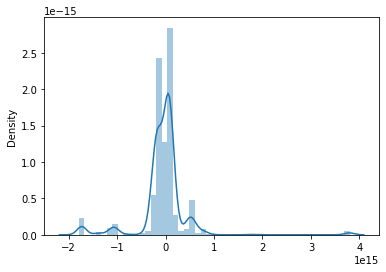

In [386]:
sns.distplot(x=final_data['delay']) # predicted delay

# :) 